In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [3]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [4]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [5]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [6]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [7]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [8]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [9]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [10]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [11]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

## Attach target columns to dataset

In [12]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
cumulative_stats_copy_df['home_win'] = winners_df
cumulative_stats_copy_df['greater_fgp'] = greater_fgp_df
cumulative_stats_copy_df['greater_fg3'] = greater_fg3_df
cumulative_stats_copy_df['greater_ft'] = greater_ft_df
cumulative_stats_copy_df['greater_ast'] = greater_ast_df
cumulative_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [13]:
cumulative_stats_copy_df = cumulative_stats_copy_df[(cumulative_stats_copy_df['GAMES_PLAYED_home']>0) & (cumulative_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = cumulative_stats_copy_df['home_win']
greater_fgp_df = cumulative_stats_copy_df['greater_fgp']
greater_fg3_df = cumulative_stats_copy_df['greater_fg3']
greater_ft_df = cumulative_stats_copy_df['greater_ft']
greater_ast_df = cumulative_stats_copy_df['greater_ast']
greater_reb_df = cumulative_stats_copy_df['greater_reb']

## Remove non-data

In [14]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

PPG_total_home  FG_PCT_total_home  FG3_PCT_total_home  \
19         104.000000           0.527000            0.429000   
21          86.000000           0.380000            0.188000   
22          86.000000           0.352000            0.222000   
23          58.000000           0.457000            0.667000   
24          87.500000           0.432000            0.420000   
...               ...                ...                 ...   
23515      111.500000           0.443500            0.353000   
23516      105.000000           0.438000            0.383000   
23517      119.333333           0.466667            0.329333   
23518      100.000000           0.415000            0.321500   
23519      112.666667           0.444333            0.305333   

       FT_PCT_total_home  APG_total_home  RPG_total_home  PPG_total_away  \
19              0.657000       22.000000       33.000000      101.000000   
21              0.852000       19.000000       37.000000      101.000000   
22              0.647000       15.000000       55.000000       80.000000   
23              0.700000       10.000000       31.000000       89.000000   
24              0.672000       20.500000       43.000000       79.000000   
...                  ...             ...             ...             ...   
23515           0.691000       25.000000       41.500000       92.000000   
23516           0.619000       26.000000       35.500000      108.000000   
23517           0.704667       30.666667       52.666667      111.333333   
23518           0.704500       22.000000       44.500000       93.333333   
23519           0.758000       25.000000       51.333333      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
19              0.467000            0.444000           0.871000   
21              0.464000            0.250000           0.679000   
22              0.350000            0.429000           0.750000   
23              0.462000            0.214000           0.538000   
24              0.329000            0.143000           0.897000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  W_PCT_away  W_PCT_home  
19          19.000000       39.000000    1.000000    1.000000  
21          22.000000       47.000000    1.000000    0.000000  
22          18.000000       45.000000    0.000000    1.000000  
23          21.000000       36.000000    0.000000    0.000000  
24           7.000000       44.000000    0.000000    0.500000  
...               ...             ...         ...         ...  
23515       26.000000       35.000000    0.000000    1.000000  
23516       23.000000       42.000000    1.000000    0.000000  
23517       24.000000       56.000000    0.333333    1.000000  
23518       20.000000       41.666667    0.666667    0.000000  
23519       29.666667       45.000000    0.333333    0.333333  

[23147 rows x 14 columns]

## Do hyperparameters searches

In [15]:
from sklearn.metrics import classification_report

In [16]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [17]:
from sklearn.utils.class_weight import compute_sample_weight

In [18]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [19]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [20]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best Random Forest accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [21]:
from imblearn.combine import SMOTEENN

In [22]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(cumulative_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [23]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            RandomForestClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train Random Forest without pruning

i=0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       868
           1       0.69      0.35      0.46       508

    accuracy                           0.70      1376
   macro avg       0.70      0.63      0.63      1376
weighted avg       0.70      0.70      0.67      1376



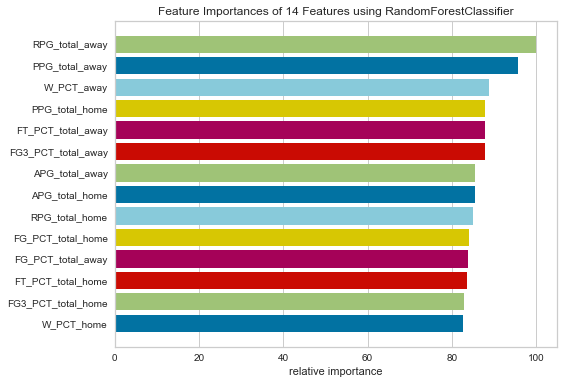

---------------------------------------------
i=1


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       855
           1       0.72      0.34      0.46       521

    accuracy                           0.70      1376
   macro avg       0.71      0.63      0.63      1376
weighted avg       0.71      0.70      0.67      1376



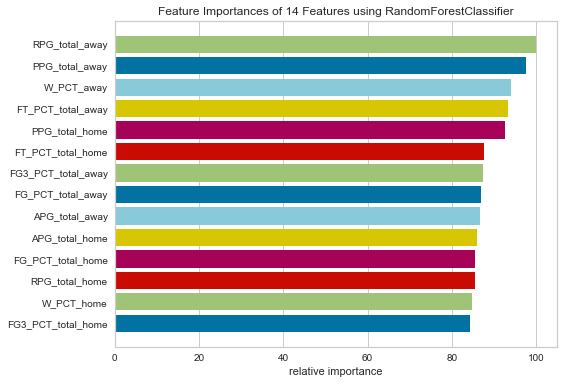

---------------------------------------------
i=2


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       866
           1       0.77      0.35      0.48       509

    accuracy                           0.72      1375
   macro avg       0.74      0.65      0.65      1375
weighted avg       0.73      0.72      0.69      1375



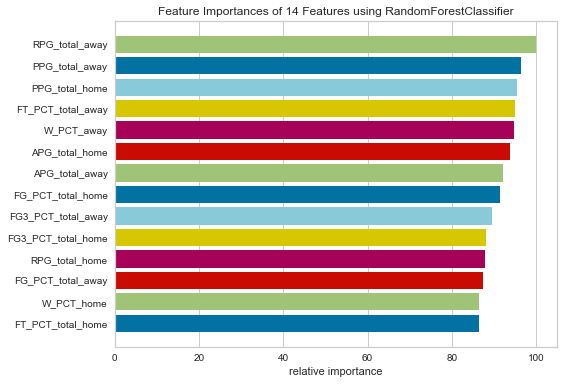

---------------------------------------------
i=3


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       867
           1       0.70      0.39      0.50       508

    accuracy                           0.71      1375
   macro avg       0.71      0.65      0.65      1375
weighted avg       0.71      0.71      0.69      1375



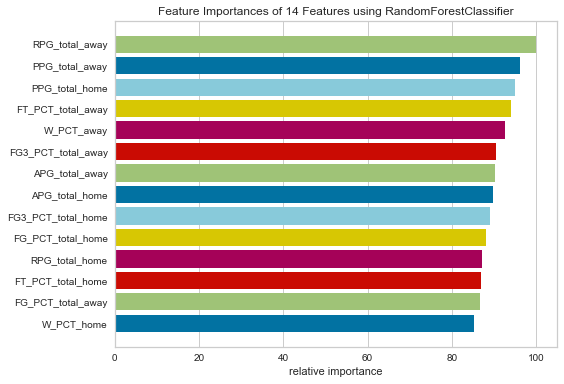

---------------------------------------------
i=4


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.73
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       873
           1       0.76      0.38      0.51       502

    accuracy                           0.73      1375
   macro avg       0.74      0.66      0.66      1375
weighted avg       0.74      0.73      0.70      1375



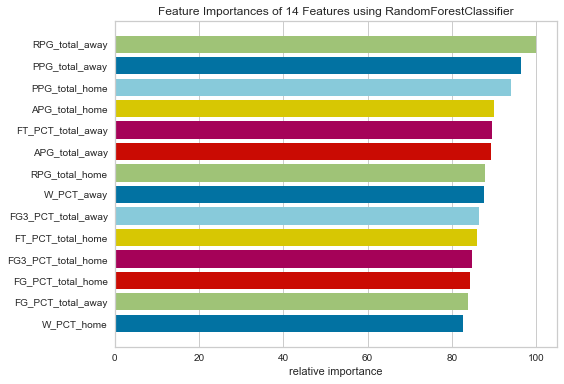

---------------------------------------------
Mean accuracy: 0.709744978858351
Max accuracy: 0.7221818181818181
Min accuracy: 0.7013081395348837
i=5


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       563
           1       0.77      0.42      0.54       412

    accuracy                           0.70       975
   macro avg       0.73      0.66      0.66       975
weighted avg       0.72      0.70      0.68       975



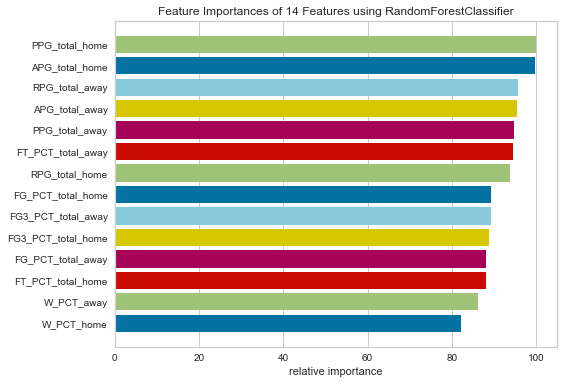

---------------------------------------------
i=6


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       612
           1       0.62      0.43      0.51       363

    accuracy                           0.69       975
   macro avg       0.67      0.64      0.64       975
weighted avg       0.68      0.69      0.68       975



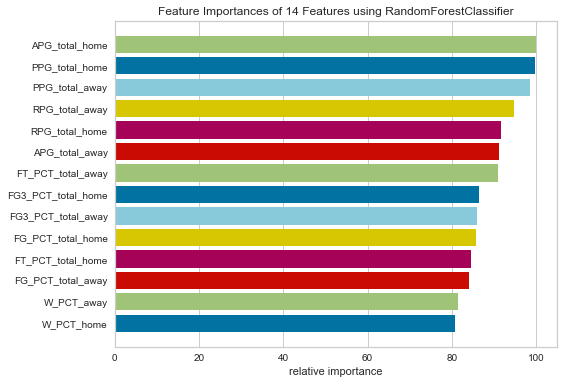

---------------------------------------------
i=7


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       549
           1       0.72      0.40      0.51       425

    accuracy                           0.67       974
   macro avg       0.69      0.64      0.63       974
weighted avg       0.68      0.67      0.65       974



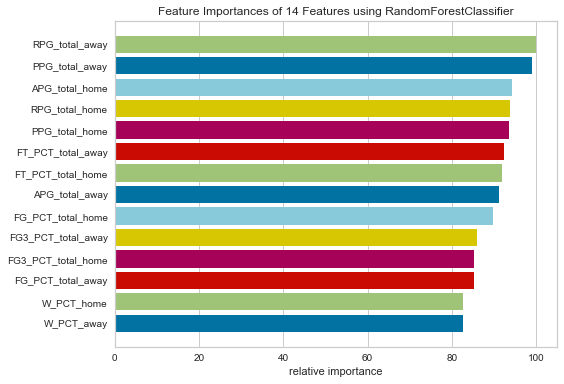

---------------------------------------------
i=8


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       595
           1       0.73      0.41      0.53       379

    accuracy                           0.71       974
   macro avg       0.72      0.66      0.66       974
weighted avg       0.71      0.71      0.69       974



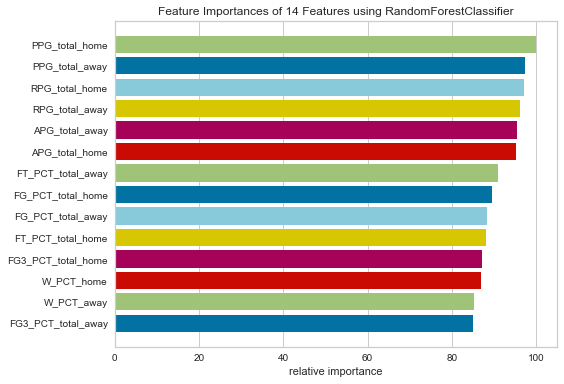

---------------------------------------------
i=9


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       565
           1       0.72      0.42      0.53       409

    accuracy                           0.69       974
   macro avg       0.70      0.65      0.65       974
weighted avg       0.69      0.69      0.67       974



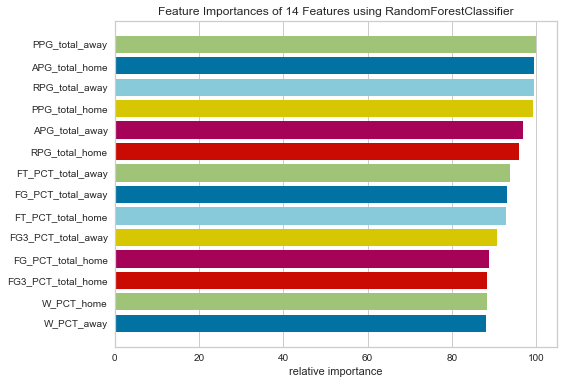

---------------------------------------------
Mean accuracy: 0.6931743273837729
Max accuracy: 0.7104722792607803
Min accuracy: 0.6694045174537988
i=10


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.62      0.76      0.68       325
           1       0.66      0.50      0.57       304

    accuracy                           0.64       629
   macro avg       0.64      0.63      0.63       629
weighted avg       0.64      0.64      0.63       629



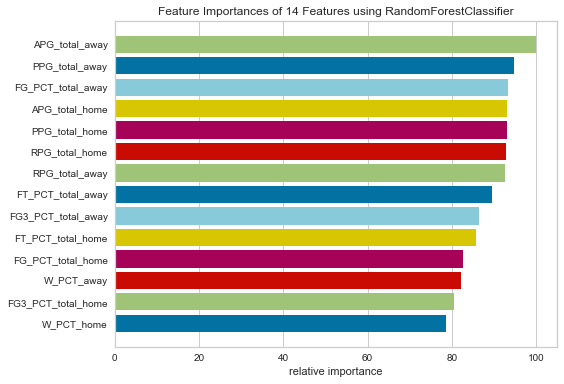

---------------------------------------------
i=11


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       325
           1       0.67      0.61      0.64       304

    accuracy                           0.67       629
   macro avg       0.67      0.67      0.67       629
weighted avg       0.67      0.67      0.67       629



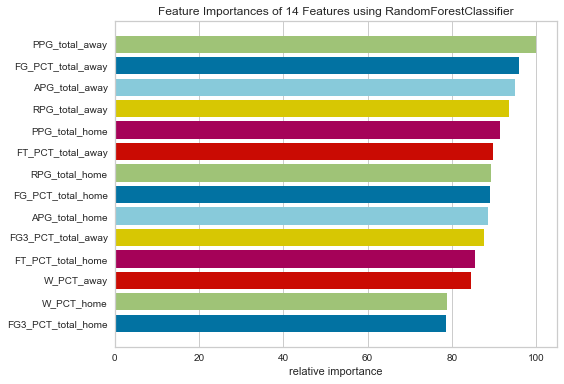

---------------------------------------------
i=12


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       345
           1       0.60      0.58      0.59       284

    accuracy                           0.64       629
   macro avg       0.63      0.63      0.63       629
weighted avg       0.64      0.64      0.64       629



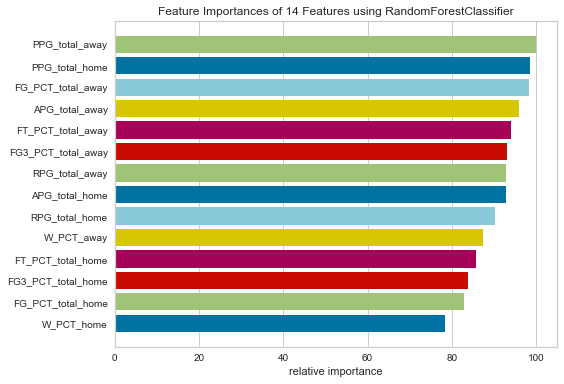

---------------------------------------------
i=13


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       321
           1       0.67      0.56      0.61       308

    accuracy                           0.65       629
   macro avg       0.65      0.65      0.64       629
weighted avg       0.65      0.65      0.64       629



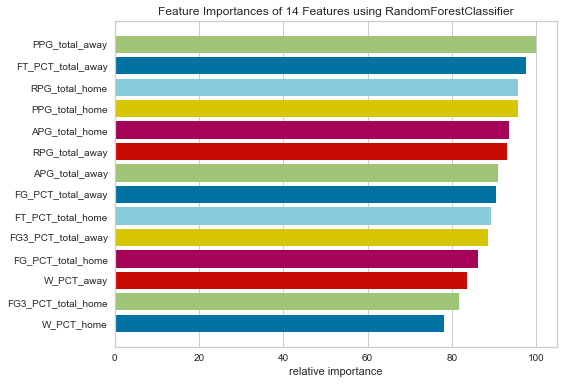

---------------------------------------------
i=14


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       329
           1       0.67      0.55      0.60       300

    accuracy                           0.66       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.66      0.65       629



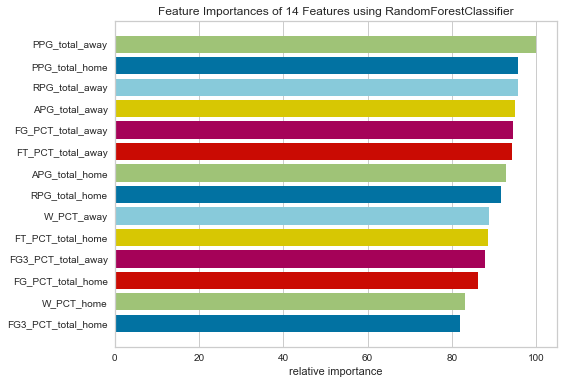

---------------------------------------------
Mean accuracy: 0.6470588235294118
Max accuracy: 0.6677265500794912
Min accuracy: 0.6359300476947536
i=15


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       301
           1       0.68      0.71      0.69       331

    accuracy                           0.67       632
   macro avg       0.67      0.67      0.67       632
weighted avg       0.67      0.67      0.67       632



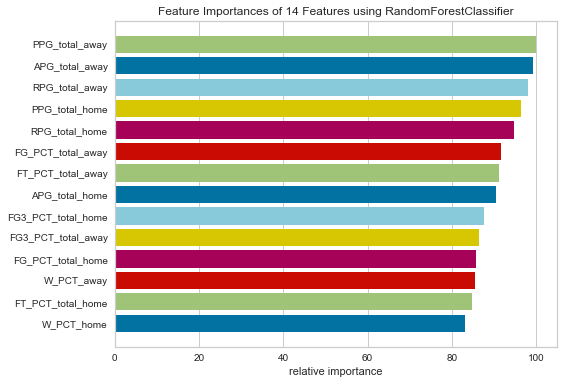

---------------------------------------------
i=16


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       305
           1       0.68      0.65      0.67       327

    accuracy                           0.66       632
   macro avg       0.66      0.66      0.66       632
weighted avg       0.66      0.66      0.66       632



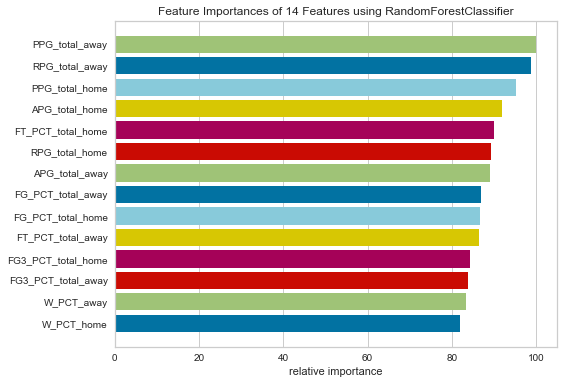

---------------------------------------------
i=17


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       335
           1       0.62      0.64      0.63       297

    accuracy                           0.64       632
   macro avg       0.64      0.64      0.64       632
weighted avg       0.64      0.64      0.64       632



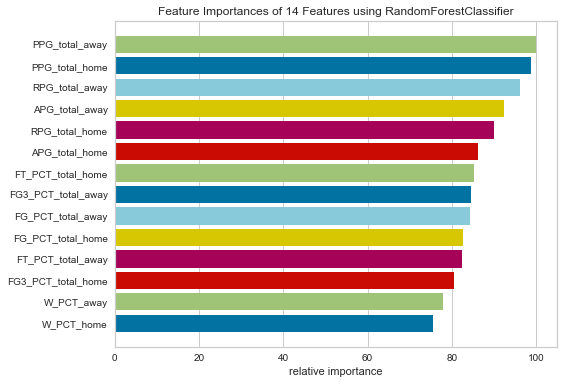

---------------------------------------------
i=18


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       297
           1       0.70      0.61      0.65       334

    accuracy                           0.65       631
   macro avg       0.66      0.66      0.65       631
weighted avg       0.66      0.65      0.65       631



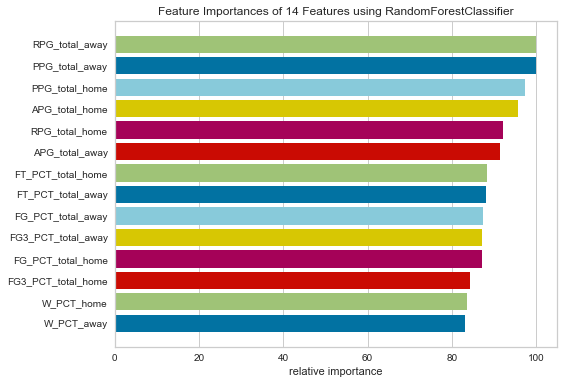

---------------------------------------------
i=19


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       313
           1       0.66      0.66      0.66       318

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.66      0.66      0.66       631



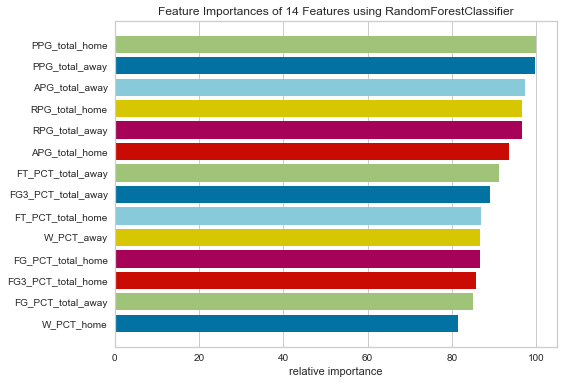

---------------------------------------------
Mean accuracy: 0.6569038496258701
Max accuracy: 0.6693037974683544
Min accuracy: 0.6439873417721519
i=20


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       581
           1       0.69      0.40      0.51       389

    accuracy                           0.69       970
   macro avg       0.69      0.64      0.64       970
weighted avg       0.69      0.69      0.67       970



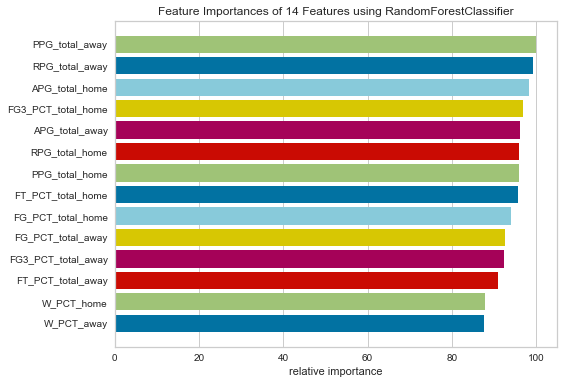

---------------------------------------------
i=21


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       569
           1       0.67      0.39      0.49       401

    accuracy                           0.67       970
   macro avg       0.67      0.63      0.62       970
weighted avg       0.67      0.67      0.64       970



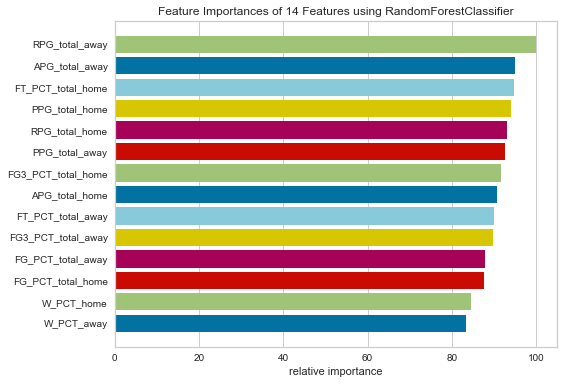

---------------------------------------------
i=22


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       558
           1       0.67      0.39      0.49       412

    accuracy                           0.66       970
   macro avg       0.66      0.62      0.62       970
weighted avg       0.66      0.66      0.64       970



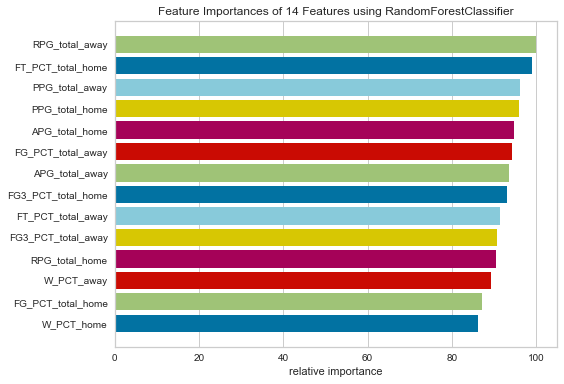

---------------------------------------------
i=23


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       596
           1       0.69      0.42      0.52       374

    accuracy                           0.71       970
   macro avg       0.70      0.65      0.65       970
weighted avg       0.70      0.71      0.69       970



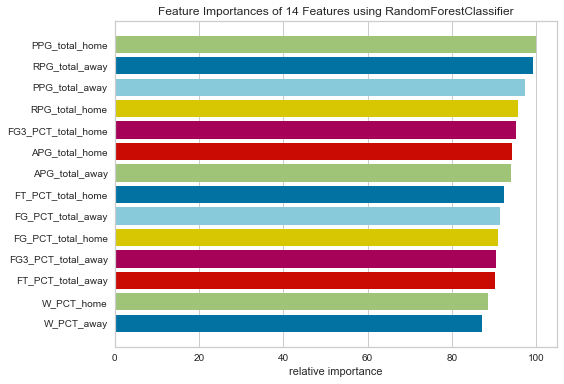

---------------------------------------------
i=24


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       554
           1       0.76      0.41      0.54       415

    accuracy                           0.69       969
   macro avg       0.72      0.66      0.65       969
weighted avg       0.71      0.69      0.67       969



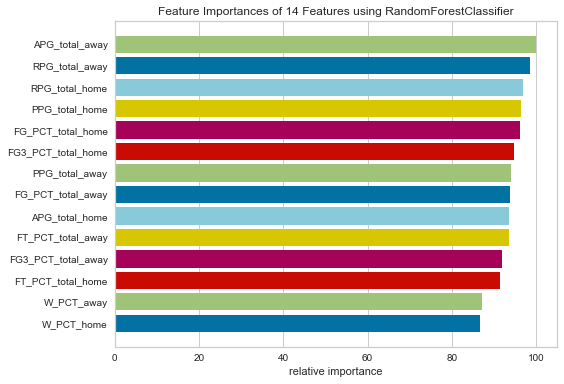

---------------------------------------------
Mean accuracy: 0.6798969072164949
Max accuracy: 0.7051546391752578
Min accuracy: 0.6587628865979381
i=25


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       499
           1       0.66      0.44      0.53       346

    accuracy                           0.68       845
   macro avg       0.67      0.64      0.64       845
weighted avg       0.67      0.68      0.66       845



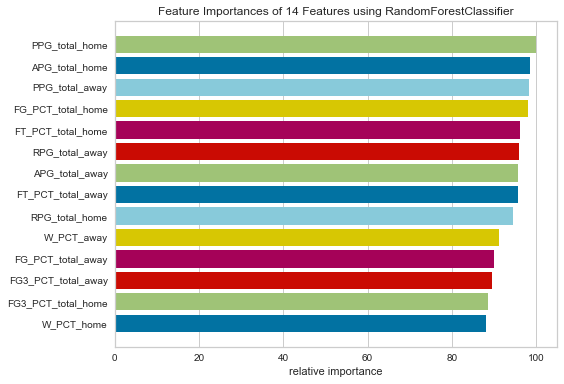

---------------------------------------------
i=26


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       471
           1       0.73      0.39      0.51       374

    accuracy                           0.67       845
   macro avg       0.69      0.64      0.63       845
weighted avg       0.68      0.67      0.64       845



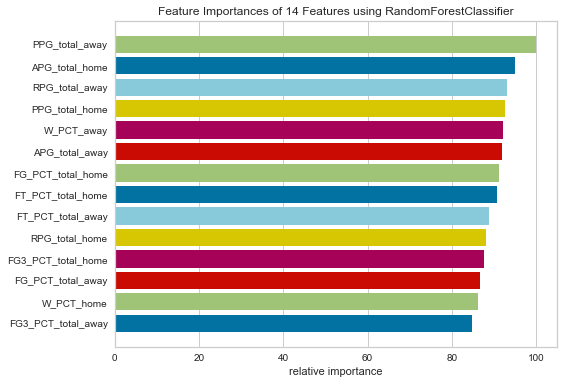

---------------------------------------------
i=27


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       475
           1       0.63      0.45      0.52       369

    accuracy                           0.64       844
   macro avg       0.64      0.62      0.62       844
weighted avg       0.64      0.64      0.63       844



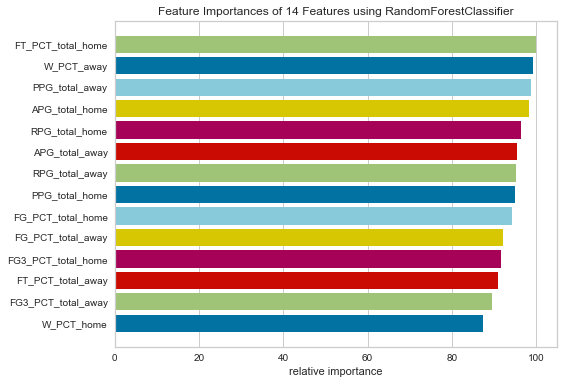

---------------------------------------------
i=28


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       513
           1       0.65      0.41      0.50       331

    accuracy                           0.68       844
   macro avg       0.67      0.63      0.63       844
weighted avg       0.67      0.68      0.66       844



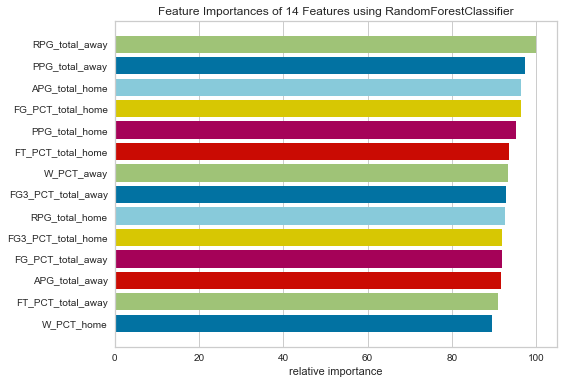

---------------------------------------------
i=29


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       475
           1       0.70      0.37      0.48       369

    accuracy                           0.65       844
   macro avg       0.67      0.62      0.61       844
weighted avg       0.66      0.65      0.63       844



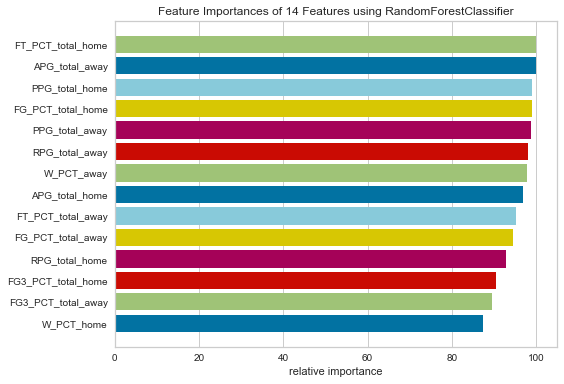

---------------------------------------------
Mean accuracy: 0.6663675369471942
Max accuracy: 0.6800947867298578
Min accuracy: 0.6421800947867299


In [24]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

## Try pruning max depth

i=0
WINNER:

Best Random Forest accuracy ({'max_depth': 379, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       868
           1       0.69      0.35      0.46       508

    accuracy                           0.70      1376
   macro avg       0.70      0.63      0.63      1376
weighted avg       0.70      0.70      0.67      1376



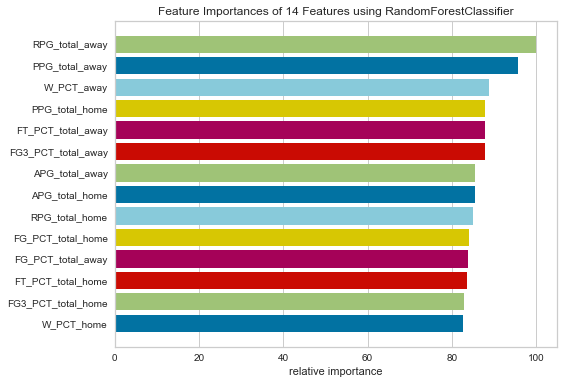

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_depth': 207, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       855
           1       0.72      0.34      0.46       521

    accuracy                           0.70      1376
   macro avg       0.71      0.63      0.63      1376
weighted avg       0.71      0.70      0.67      1376



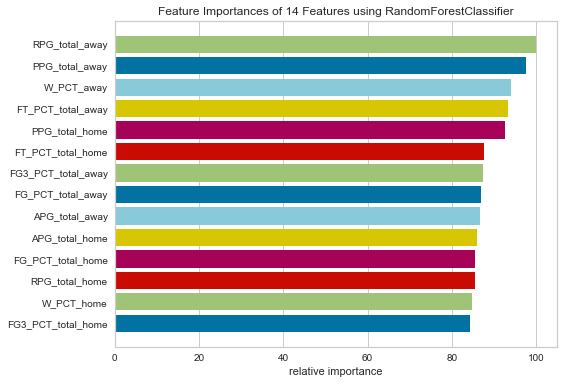

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_depth': 279, 'criterion': 'gini'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       866
           1       0.77      0.35      0.48       509

    accuracy                           0.72      1375
   macro avg       0.74      0.65      0.65      1375
weighted avg       0.73      0.72      0.69      1375



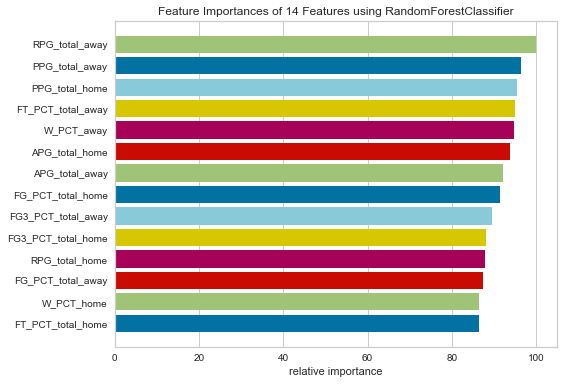

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_depth': 125, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       867
           1       0.70      0.39      0.50       508

    accuracy                           0.71      1375
   macro avg       0.71      0.65      0.65      1375
weighted avg       0.71      0.71      0.69      1375



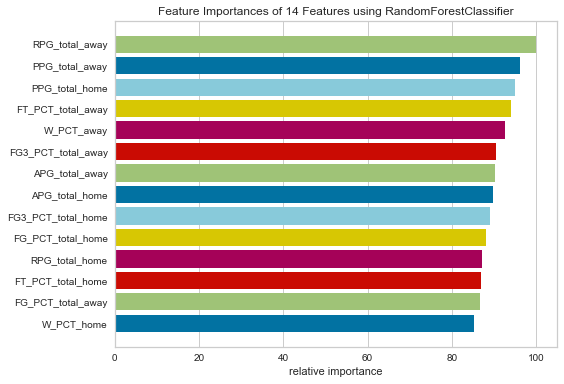

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_depth': 342, 'criterion': 'entropy'}): 0.73
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       873
           1       0.76      0.38      0.51       502

    accuracy                           0.73      1375
   macro avg       0.74      0.66      0.66      1375
weighted avg       0.74      0.73      0.70      1375



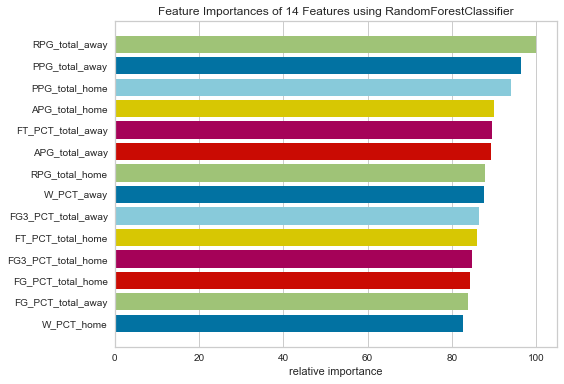

---------------------------------------------
Mean accuracy: 0.709744978858351
Max accuracy: 0.7221818181818181
Min accuracy: 0.7013081395348837
i=5
FGP:

Best Random Forest accuracy ({'max_depth': 487, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       563
           1       0.77      0.42      0.54       412

    accuracy                           0.70       975
   macro avg       0.73      0.66      0.66       975
weighted avg       0.72      0.70      0.68       975



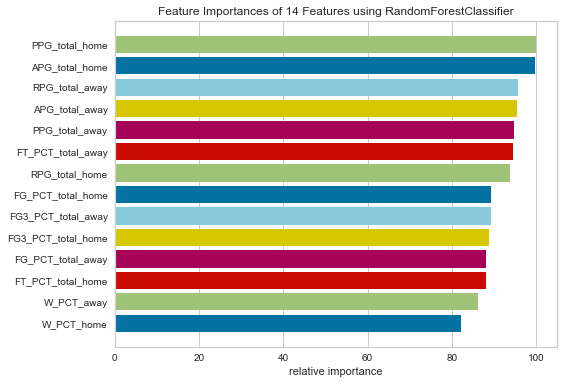

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_depth': 453, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       612
           1       0.62      0.43      0.51       363

    accuracy                           0.69       975
   macro avg       0.67      0.64      0.64       975
weighted avg       0.68      0.69      0.68       975



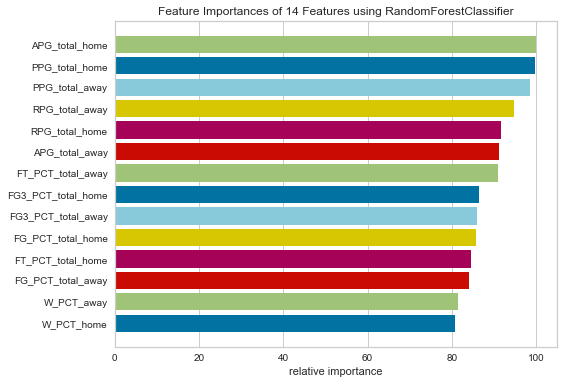

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_depth': 479, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       549
           1       0.72      0.40      0.51       425

    accuracy                           0.67       974
   macro avg       0.69      0.64      0.63       974
weighted avg       0.68      0.67      0.65       974



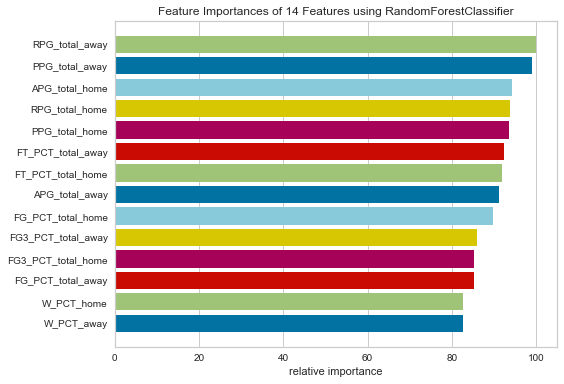

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_depth': 235, 'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       595
           1       0.73      0.41      0.53       379

    accuracy                           0.71       974
   macro avg       0.72      0.66      0.66       974
weighted avg       0.71      0.71      0.69       974



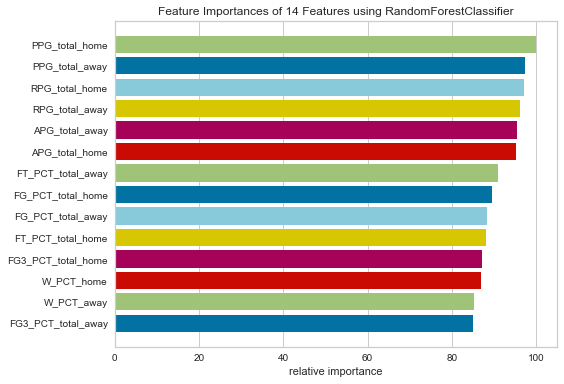

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_depth': 16, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       565
           1       0.74      0.32      0.44       409

    accuracy                           0.67       974
   macro avg       0.69      0.62      0.60       974
weighted avg       0.69      0.67      0.63       974



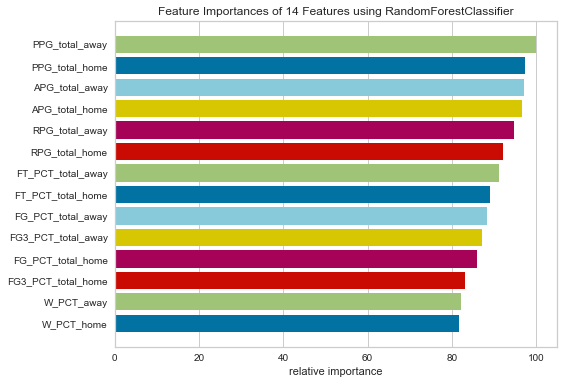

---------------------------------------------
Mean accuracy: 0.6931743273837729
Max accuracy: 0.7104722792607803
Min accuracy: 0.6694045174537988
i=10
FG3:

Best Random Forest accuracy ({'max_depth': 330, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.62      0.76      0.68       325
           1       0.66      0.50      0.57       304

    accuracy                           0.64       629
   macro avg       0.64      0.63      0.63       629
weighted avg       0.64      0.64      0.63       629



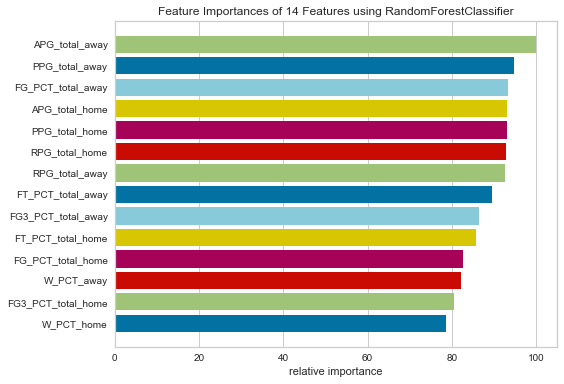

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_depth': 64, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       325
           1       0.67      0.61      0.64       304

    accuracy                           0.67       629
   macro avg       0.67      0.67      0.67       629
weighted avg       0.67      0.67      0.67       629



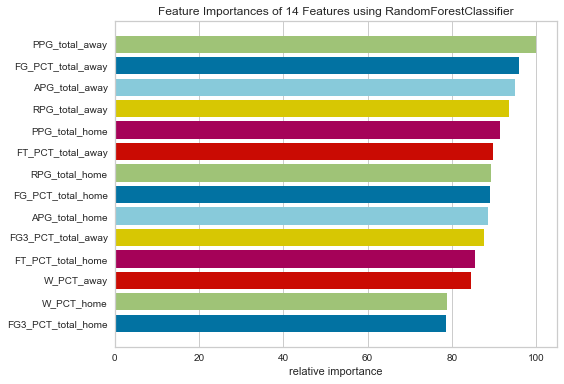

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_depth': 462, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       345
           1       0.60      0.58      0.59       284

    accuracy                           0.64       629
   macro avg       0.63      0.63      0.63       629
weighted avg       0.64      0.64      0.64       629



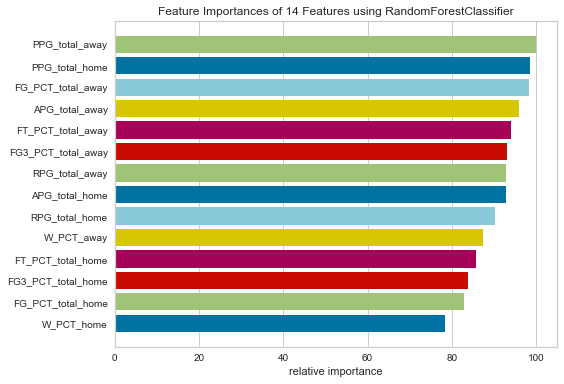

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_depth': 191, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       321
           1       0.67      0.56      0.61       308

    accuracy                           0.65       629
   macro avg       0.65      0.65      0.64       629
weighted avg       0.65      0.65      0.64       629



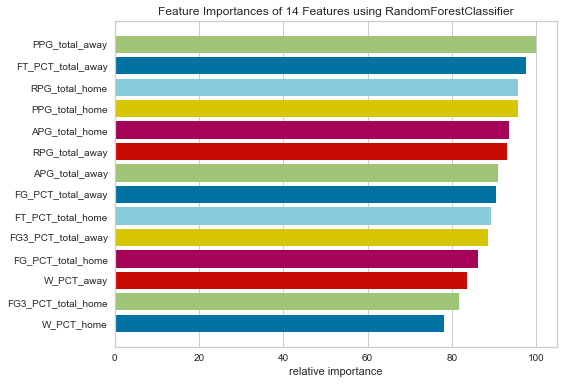

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_depth': 306, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       329
           1       0.67      0.55      0.60       300

    accuracy                           0.66       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.66      0.65       629



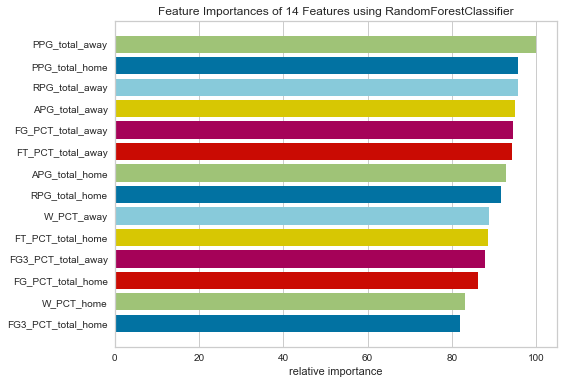

---------------------------------------------
Mean accuracy: 0.6470588235294118
Max accuracy: 0.6677265500794912
Min accuracy: 0.6359300476947536
i=15
FT:

Best Random Forest accuracy ({'max_depth': 397, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       301
           1       0.68      0.71      0.69       331

    accuracy                           0.67       632
   macro avg       0.67      0.67      0.67       632
weighted avg       0.67      0.67      0.67       632



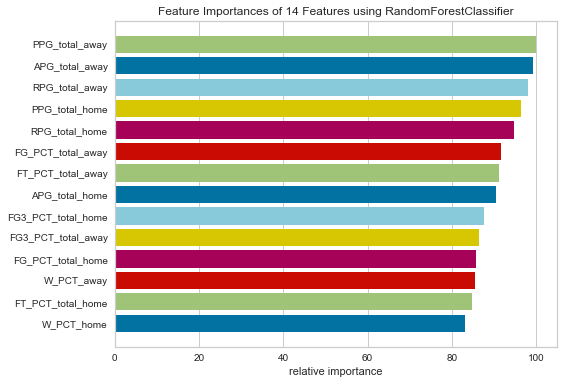

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_depth': 19, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       305
           1       0.68      0.67      0.67       327

    accuracy                           0.66       632
   macro avg       0.66      0.66      0.66       632
weighted avg       0.66      0.66      0.66       632



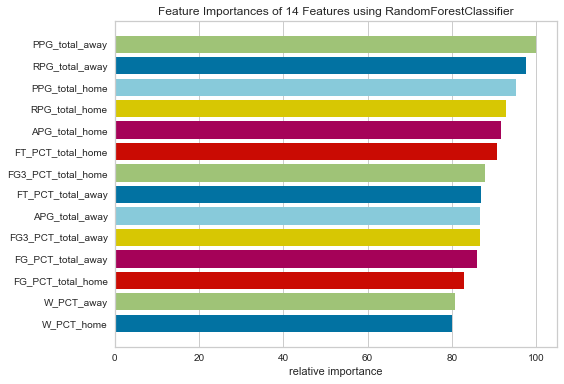

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_depth': 204, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       335
           1       0.62      0.64      0.63       297

    accuracy                           0.64       632
   macro avg       0.64      0.64      0.64       632
weighted avg       0.64      0.64      0.64       632



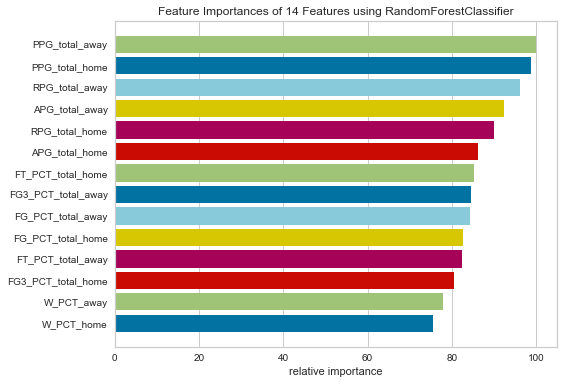

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_depth': 496, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       297
           1       0.70      0.61      0.65       334

    accuracy                           0.65       631
   macro avg       0.66      0.66      0.65       631
weighted avg       0.66      0.65      0.65       631



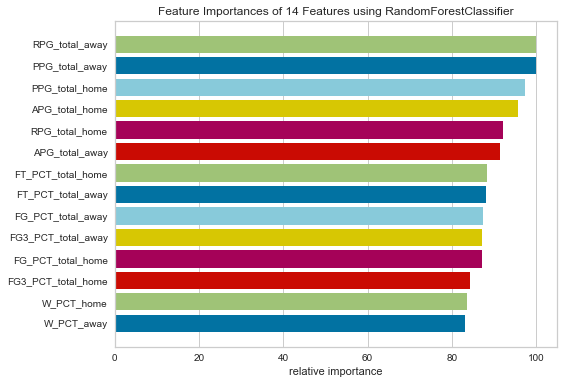

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_depth': 300, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       313
           1       0.66      0.66      0.66       318

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.66      0.66      0.66       631



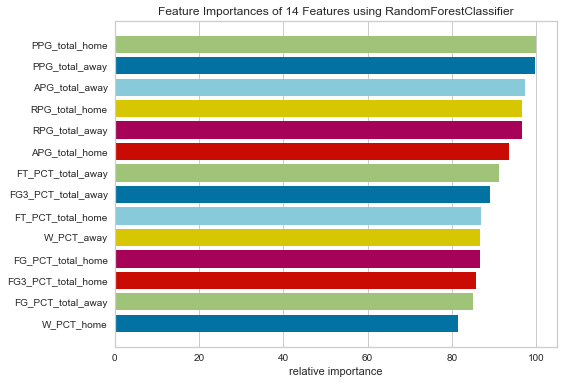

---------------------------------------------
Mean accuracy: 0.6576949888663765
Max accuracy: 0.6693037974683544
Min accuracy: 0.6439873417721519
i=20
AST:

Best Random Forest accuracy ({'max_depth': 30, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.89      0.77       581
           1       0.70      0.40      0.51       389

    accuracy                           0.69       970
   macro avg       0.69      0.64      0.64       970
weighted avg       0.69      0.69      0.67       970



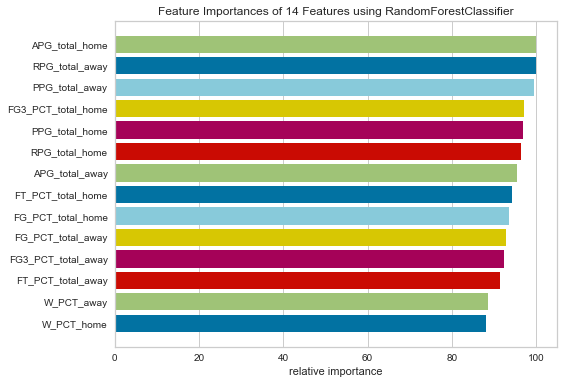

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_depth': 5, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       569
           1       0.67      0.03      0.06       401

    accuracy                           0.59       970
   macro avg       0.63      0.51      0.40       970
weighted avg       0.62      0.59      0.46       970



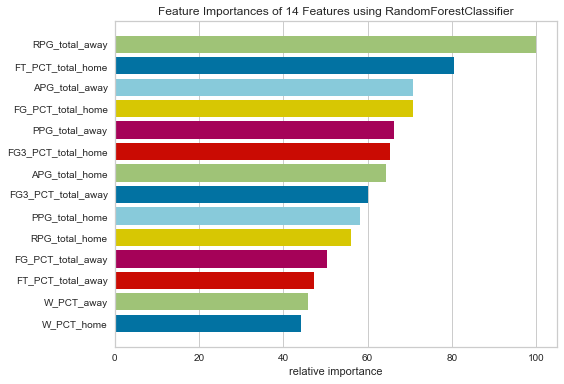

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_depth': 75, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       558
           1       0.67      0.39      0.49       412

    accuracy                           0.66       970
   macro avg       0.66      0.62      0.62       970
weighted avg       0.66      0.66      0.64       970



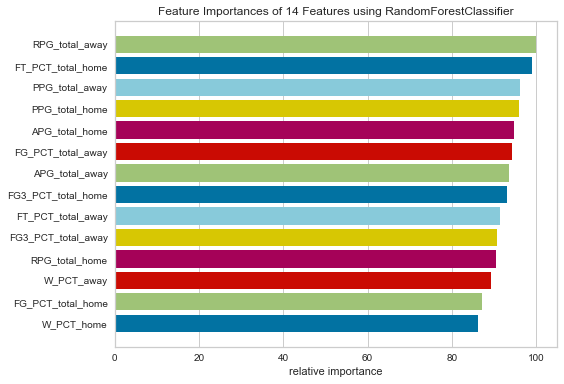

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_depth': 216, 'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       596
           1       0.69      0.42      0.52       374

    accuracy                           0.71       970
   macro avg       0.70      0.65      0.65       970
weighted avg       0.70      0.71      0.69       970



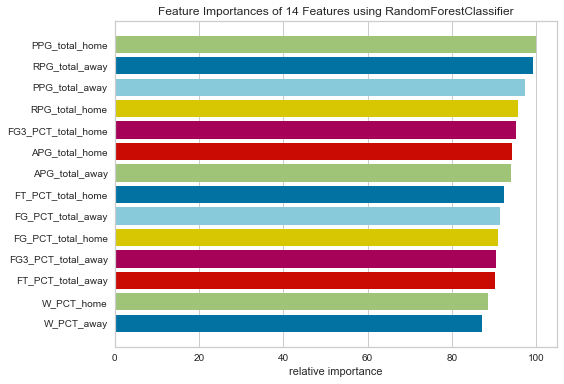

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_depth': 39, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       554
           1       0.78      0.40      0.53       415

    accuracy                           0.70       969
   macro avg       0.73      0.66      0.65       969
weighted avg       0.72      0.70      0.67       969



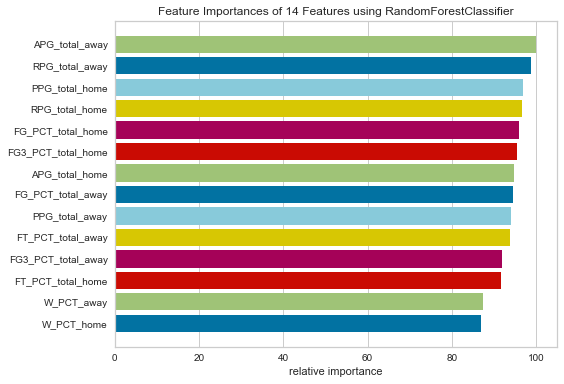

---------------------------------------------
Mean accuracy: 0.6615979381443299
Max accuracy: 0.7051546391752578
Min accuracy: 0.5927835051546392
i=25
REB:

Best Random Forest accuracy ({'max_depth': 397, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       499
           1       0.66      0.44      0.53       346

    accuracy                           0.68       845
   macro avg       0.67      0.64      0.64       845
weighted avg       0.67      0.68      0.66       845



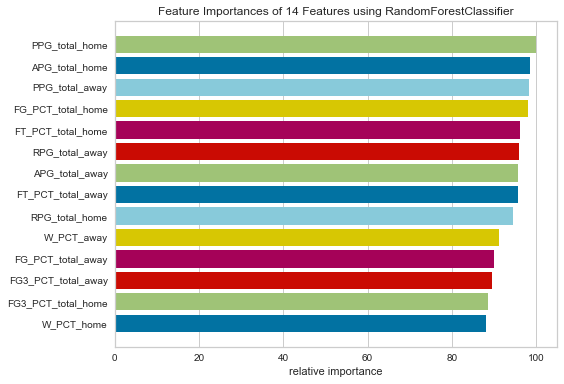

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_depth': 5, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.98      0.72       471
           1       0.68      0.05      0.09       374

    accuracy                           0.57       845
   macro avg       0.62      0.52      0.41       845
weighted avg       0.62      0.57      0.44       845



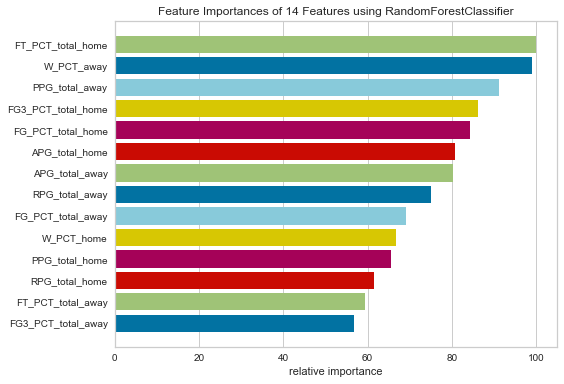

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_depth': 338, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       475
           1       0.63      0.45      0.52       369

    accuracy                           0.64       844
   macro avg       0.64      0.62      0.62       844
weighted avg       0.64      0.64      0.63       844



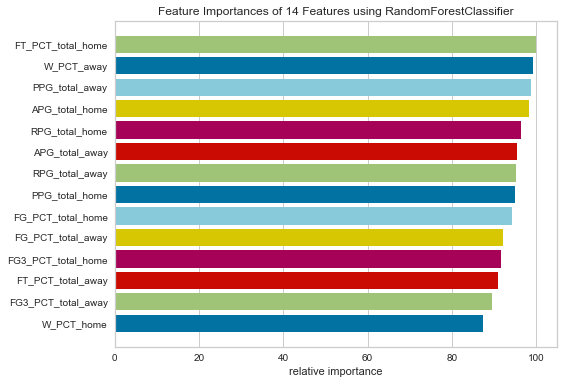

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_depth': 332, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       513
           1       0.65      0.41      0.50       331

    accuracy                           0.68       844
   macro avg       0.67      0.63      0.63       844
weighted avg       0.67      0.68      0.66       844



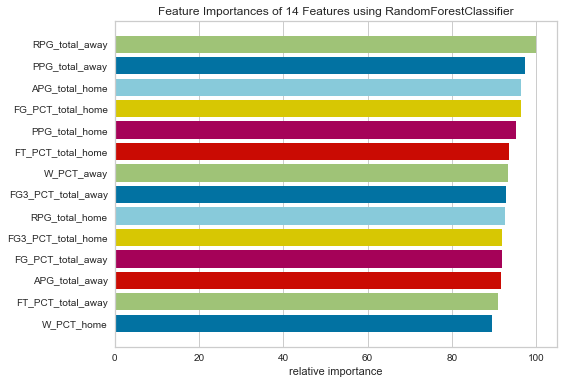

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_depth': 460, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       475
           1       0.70      0.37      0.48       369

    accuracy                           0.65       844
   macro avg       0.67      0.62      0.61       844
weighted avg       0.66      0.65      0.63       844



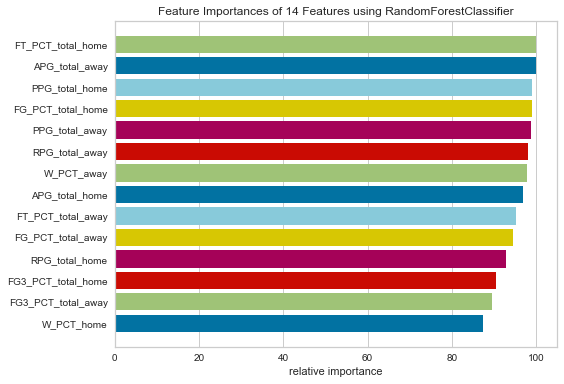

---------------------------------------------
Mean accuracy: 0.6418113239294427
Max accuracy: 0.6800947867298578
Min accuracy: 0.5692307692307692


In [25]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,500)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

i=0
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       868
           1       0.00      0.00      0.00       508

    accuracy                           0.63      1376
   macro avg       0.32      0.50      0.39      1376
weighted avg       0.40      0.63      0.49      1376



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

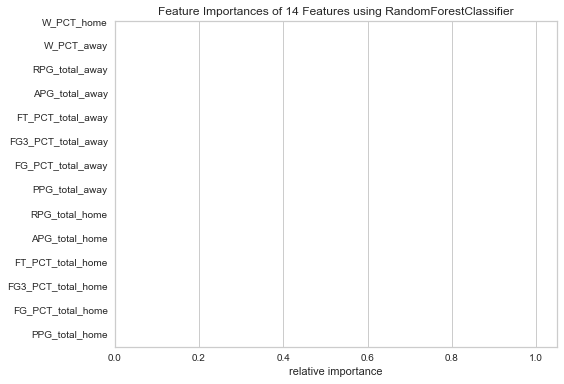

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       855
           1       0.00      0.00      0.00       521

    accuracy                           0.62      1376
   macro avg       0.31      0.50      0.38      1376
weighted avg       0.39      0.62      0.48      1376



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

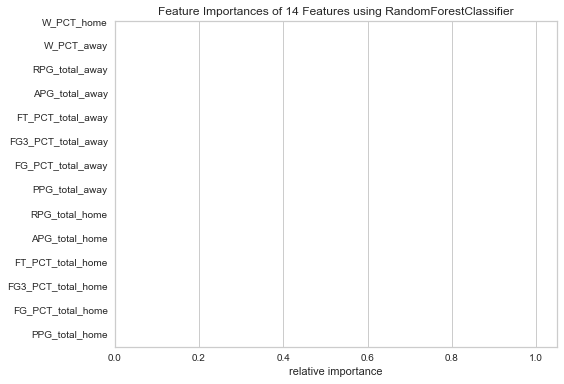

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       866
           1       0.00      0.00      0.00       509

    accuracy                           0.63      1375
   macro avg       0.31      0.50      0.39      1375
weighted avg       0.40      0.63      0.49      1375



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

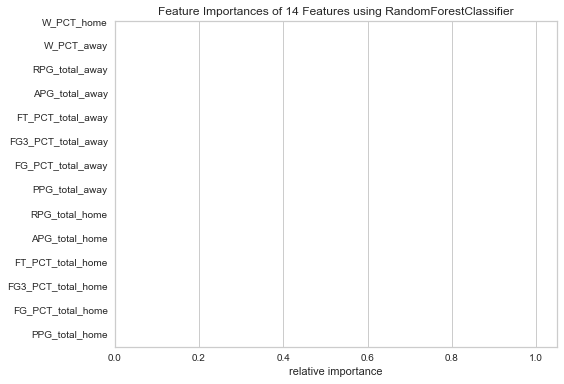

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       867
           1       0.00      0.00      0.00       508

    accuracy                           0.63      1375
   macro avg       0.32      0.50      0.39      1375
weighted avg       0.40      0.63      0.49      1375



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

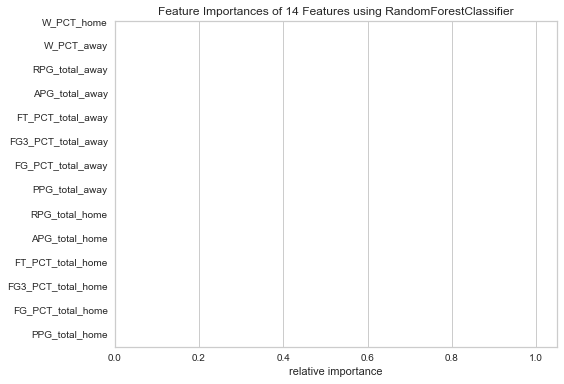

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       873
           1       0.00      0.00      0.00       502

    accuracy                           0.63      1375
   macro avg       0.32      0.50      0.39      1375
weighted avg       0.40      0.63      0.49      1375



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

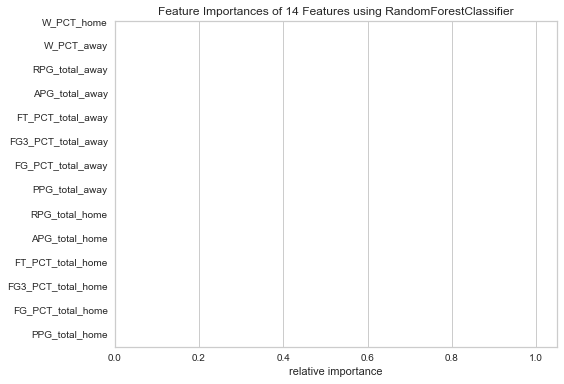

---------------------------------------------
Mean accuracy: 0.628135967230444
Max accuracy: 0.6308139534883721
Min accuracy: 0.6213662790697675
i=5
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       563
           1       0.00      0.00      0.00       412

    accuracy                           0.58       975
   macro avg       0.29      0.50      0.37       975
weighted avg       0.33      0.58      0.42       975



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

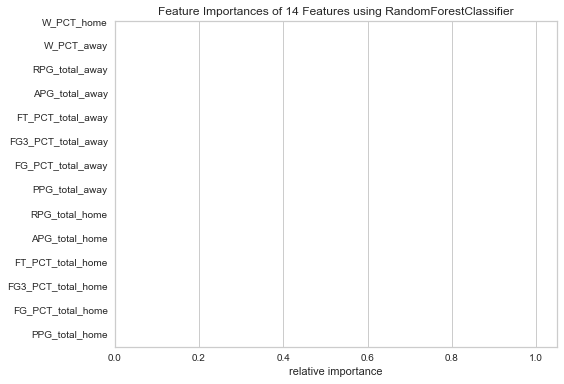

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.45, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       612
           1       0.00      0.00      0.00       363

    accuracy                           0.63       975
   macro avg       0.31      0.50      0.39       975
weighted avg       0.39      0.63      0.48       975



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

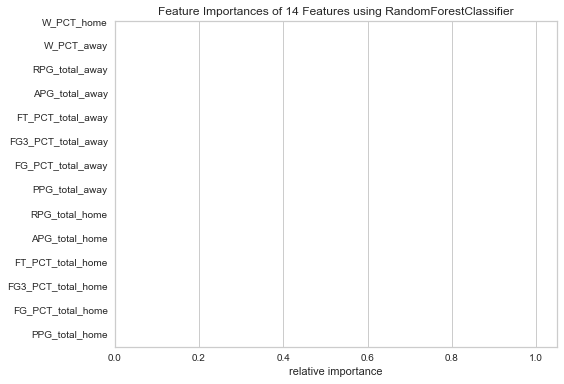

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       549
           1       0.00      0.00      0.00       425

    accuracy                           0.56       974
   macro avg       0.28      0.50      0.36       974
weighted avg       0.32      0.56      0.41       974



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

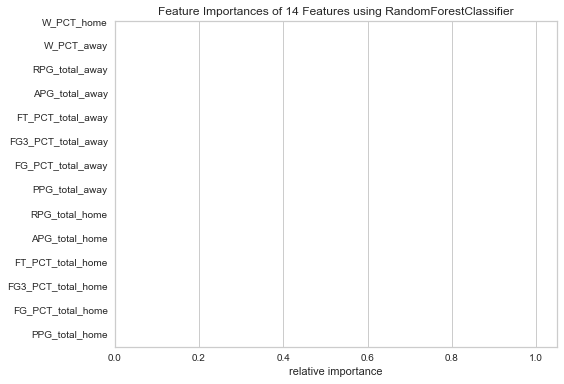

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       595
           1       0.00      0.00      0.00       379

    accuracy                           0.61       974
   macro avg       0.31      0.50      0.38       974
weighted avg       0.37      0.61      0.46       974



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

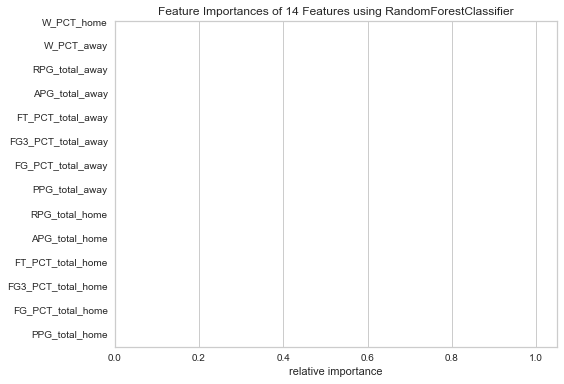

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       565
           1       0.00      0.00      0.00       409

    accuracy                           0.58       974
   macro avg       0.29      0.50      0.37       974
weighted avg       0.34      0.58      0.43       974



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

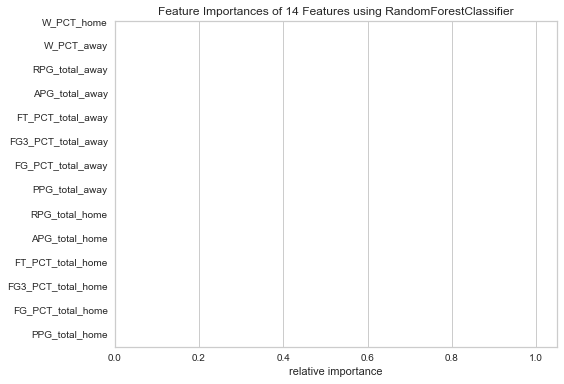

---------------------------------------------
Mean accuracy: 0.5949165482019692
Max accuracy: 0.6276923076923077
Min accuracy: 0.5636550308008214
i=10
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       325
           1       0.71      0.56      0.62       304

    accuracy                           0.67       629
   macro avg       0.68      0.67      0.67       629
weighted avg       0.68      0.67      0.67       629



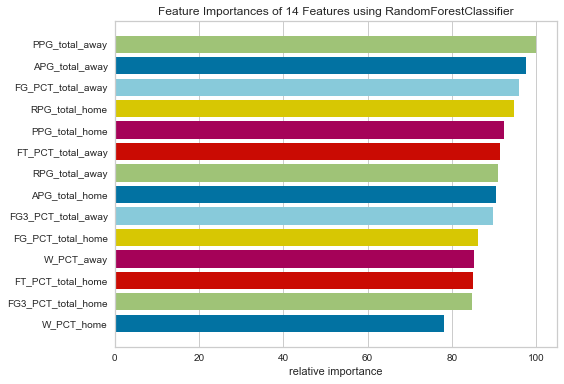

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       325
           1       0.66      0.60      0.62       304

    accuracy                           0.65       629
   macro avg       0.65      0.65      0.65       629
weighted avg       0.65      0.65      0.65       629



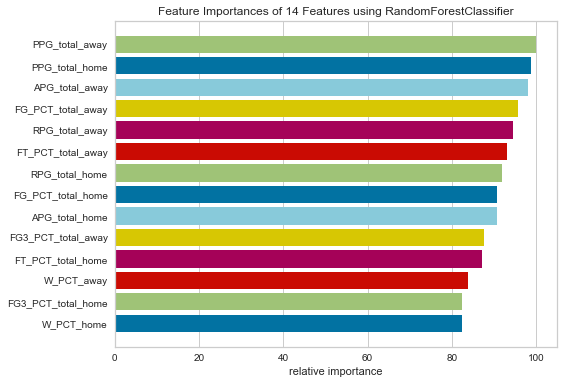

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       345
           1       0.60      0.58      0.59       284

    accuracy                           0.64       629
   macro avg       0.63      0.63      0.63       629
weighted avg       0.64      0.64      0.64       629



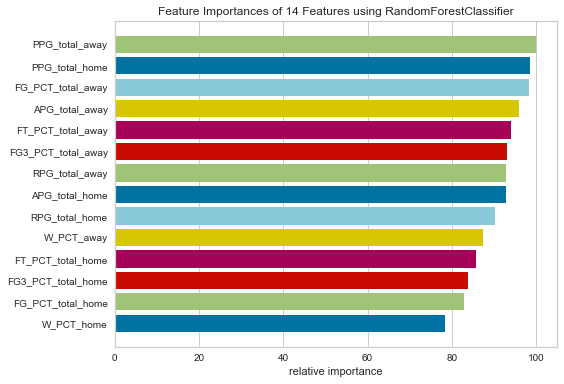

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       321
           1       0.00      0.00      0.00       308

    accuracy                           0.51       629
   macro avg       0.26      0.50      0.34       629
weighted avg       0.26      0.51      0.34       629



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

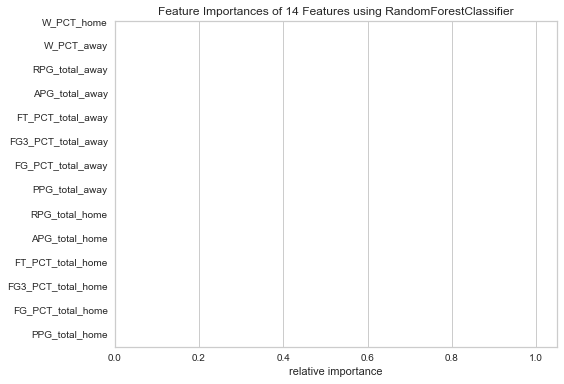

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       329
           1       0.67      0.55      0.60       300

    accuracy                           0.66       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.66      0.65       629



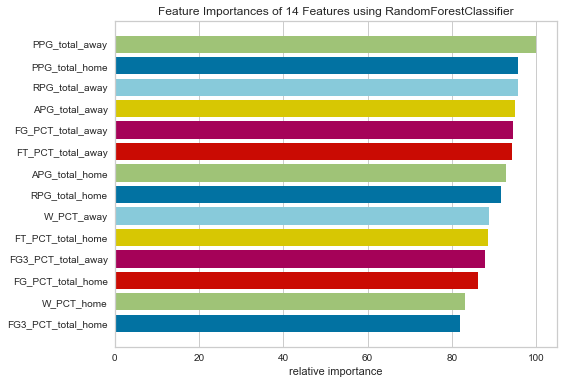

---------------------------------------------
Mean accuracy: 0.6188394276629571
Max accuracy: 0.6740858505564388
Min accuracy: 0.5103338632750397
i=15
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       301
           1       0.52      1.00      0.69       331

    accuracy                           0.52       632
   macro avg       0.26      0.50      0.34       632
weighted avg       0.27      0.52      0.36       632



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

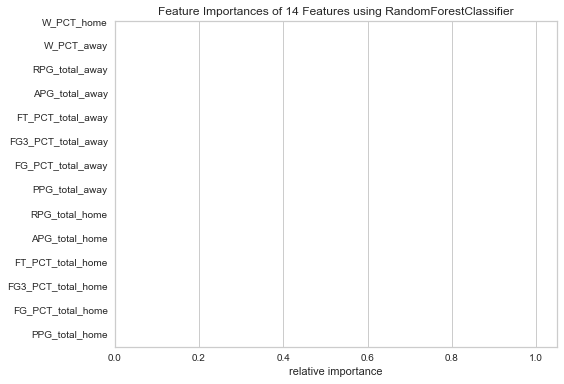

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.75, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       305
           1       0.52      1.00      0.68       327

    accuracy                           0.52       632
   macro avg       0.26      0.50      0.34       632
weighted avg       0.27      0.52      0.35       632



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

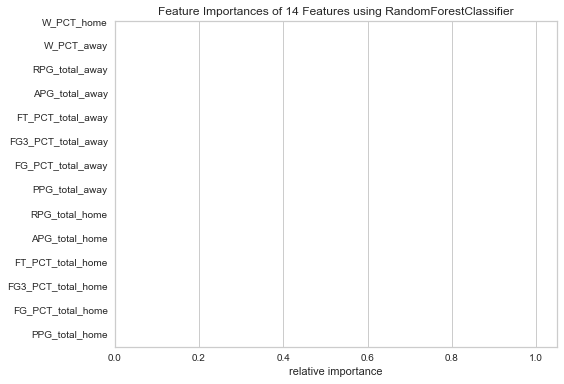

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       335
           1       0.62      0.64      0.63       297

    accuracy                           0.64       632
   macro avg       0.64      0.64      0.64       632
weighted avg       0.64      0.64      0.64       632



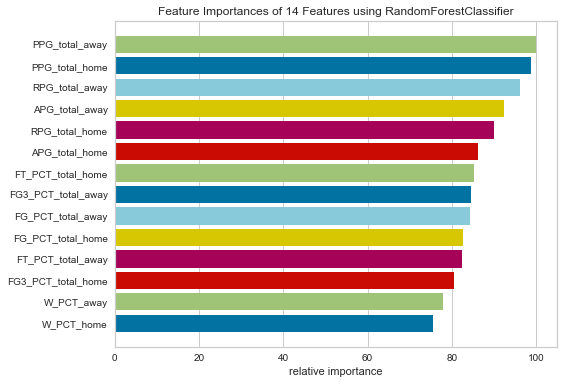

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.53      1.00      0.69       334

    accuracy                           0.53       631
   macro avg       0.26      0.50      0.35       631
weighted avg       0.28      0.53      0.37       631



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

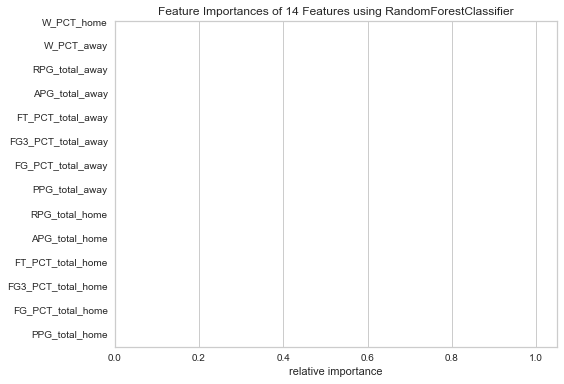

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       313
           1       0.66      0.66      0.66       318

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.66      0.66      0.66       631



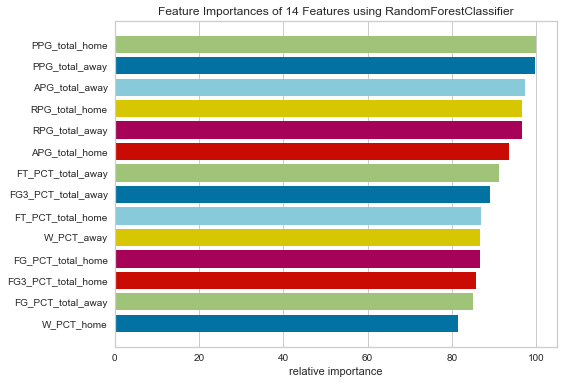

---------------------------------------------
Mean accuracy: 0.5536112810688278
Max accuracy: 0.6439873417721519
Min accuracy: 0.5174050632911392
i=20
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       581
           1       0.00      0.00      0.00       389

    accuracy                           0.60       970
   macro avg       0.30      0.50      0.37       970
weighted avg       0.36      0.60      0.45       970



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

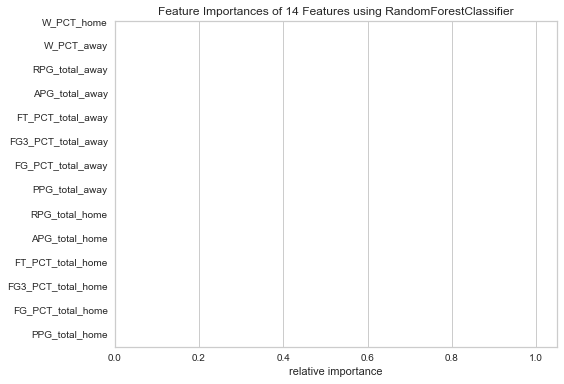

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       569
           1       0.00      0.00      0.00       401

    accuracy                           0.59       970
   macro avg       0.29      0.50      0.37       970
weighted avg       0.34      0.59      0.43       970



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

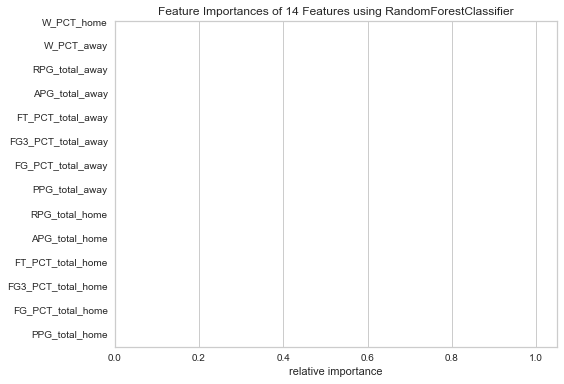

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       558
           1       0.00      0.00      0.00       412

    accuracy                           0.58       970
   macro avg       0.29      0.50      0.37       970
weighted avg       0.33      0.58      0.42       970



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

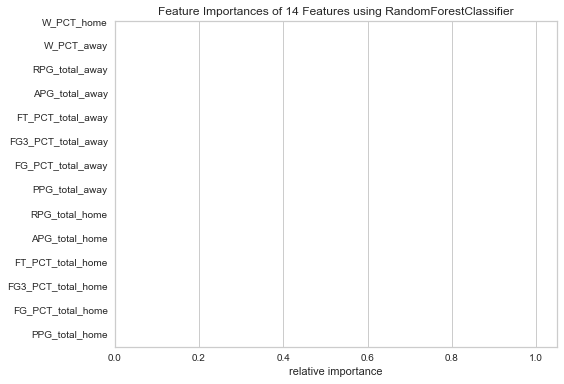

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.45, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       596
           1       0.00      0.00      0.00       374

    accuracy                           0.61       970
   macro avg       0.31      0.50      0.38       970
weighted avg       0.38      0.61      0.47       970



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

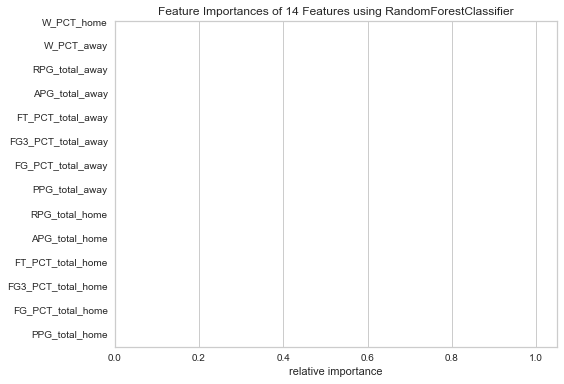

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       554
           1       0.00      0.00      0.00       415

    accuracy                           0.57       969
   macro avg       0.29      0.50      0.36       969
weighted avg       0.33      0.57      0.42       969



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

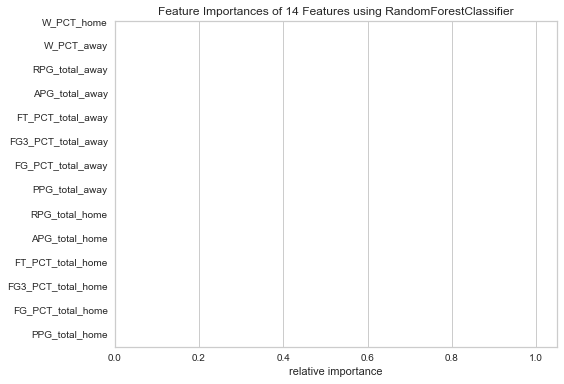

---------------------------------------------
Mean accuracy: 0.5938144329896907
Max accuracy: 0.6144329896907217
Min accuracy: 0.5752577319587628
i=25
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.1, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       499
           1       0.00      0.00      0.00       346

    accuracy                           0.59       845
   macro avg       0.30      0.50      0.37       845
weighted avg       0.35      0.59      0.44       845



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

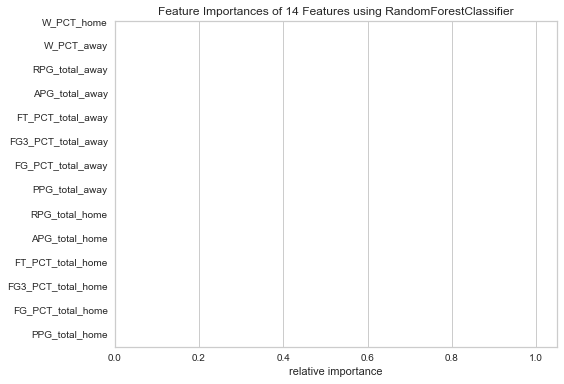

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       471
           1       0.00      0.00      0.00       374

    accuracy                           0.56       845
   macro avg       0.28      0.50      0.36       845
weighted avg       0.31      0.56      0.40       845



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

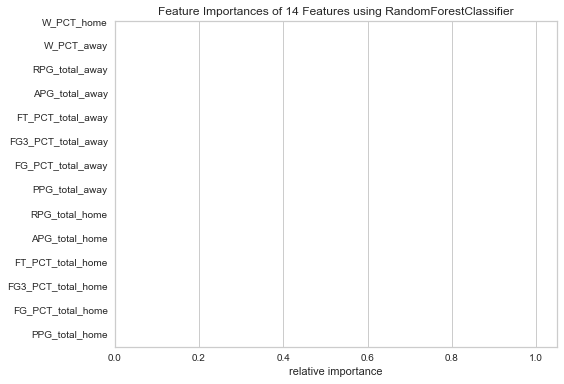

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.05, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       475
           1       0.00      0.00      0.00       369

    accuracy                           0.56       844
   macro avg       0.28      0.50      0.36       844
weighted avg       0.32      0.56      0.41       844



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

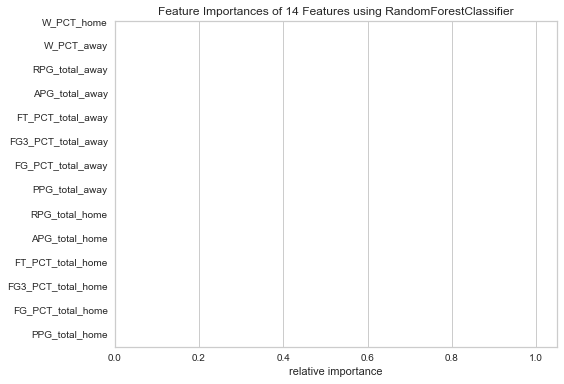

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       513
           1       0.00      0.00      0.00       331

    accuracy                           0.61       844
   macro avg       0.30      0.50      0.38       844
weighted avg       0.37      0.61      0.46       844



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

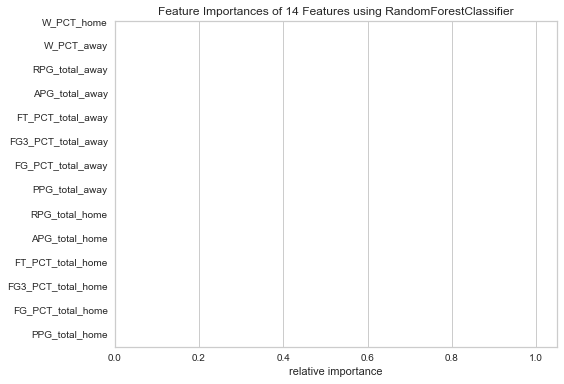

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.75, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       475
           1       0.00      0.00      0.00       369

    accuracy                           0.56       844
   macro avg       0.28      0.50      0.36       844
weighted avg       0.32      0.56      0.41       844



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

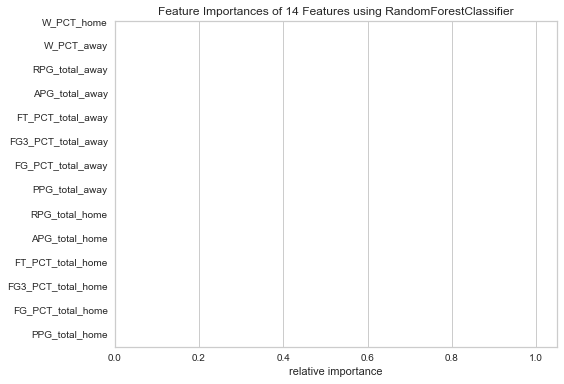

---------------------------------------------
Mean accuracy: 0.579636276956729
Max accuracy: 0.6078199052132701
Min accuracy: 0.557396449704142


In [26]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
    'criterion': ['gini', 'entropy'],
})
# print('Any non-zero min_impurity_decrease causes all classifications to be 1')

## Try prune max leaves

i=0
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 622, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       868
           1       0.69      0.31      0.43       508

    accuracy                           0.69      1376
   macro avg       0.69      0.61      0.61      1376
weighted avg       0.69      0.69      0.66      1376



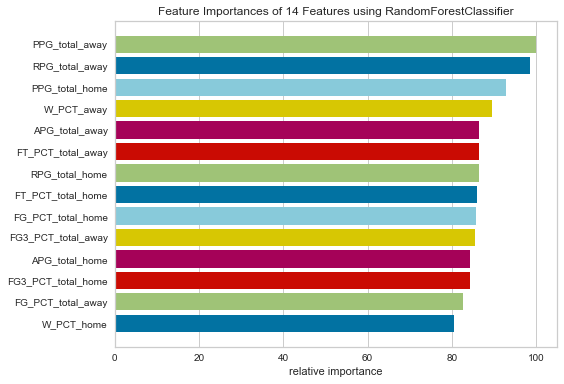

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 14, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.97      0.76       855
           1       0.53      0.06      0.11       521

    accuracy                           0.62      1376
   macro avg       0.58      0.51      0.44      1376
weighted avg       0.59      0.62      0.52      1376



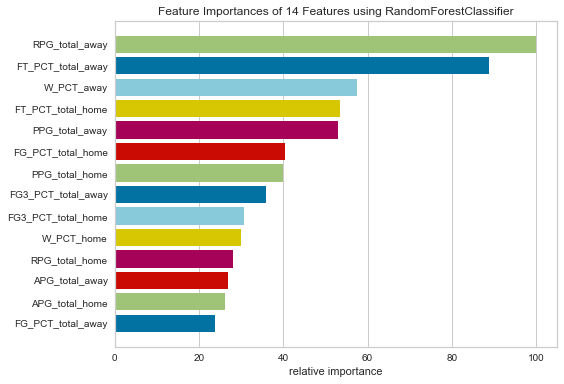

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 760, 'criterion': 'entropy'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       866
           1       0.76      0.34      0.47       509

    accuracy                           0.72      1375
   macro avg       0.74      0.64      0.64      1375
weighted avg       0.73      0.72      0.68      1375



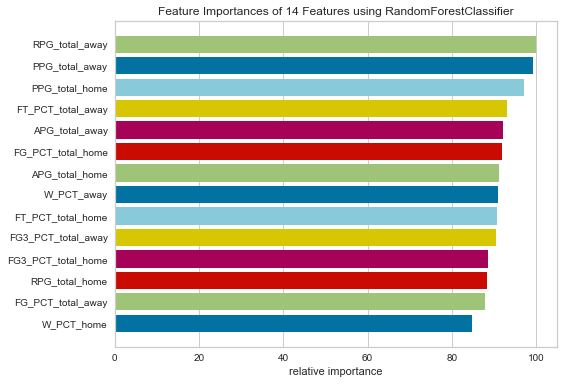

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 886, 'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       867
           1       0.71      0.38      0.49       508

    accuracy                           0.71      1375
   macro avg       0.71      0.64      0.65      1375
weighted avg       0.71      0.71      0.69      1375



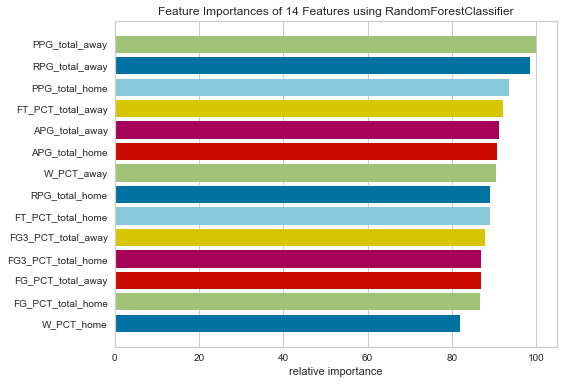

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 8, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       873
           1       0.64      0.05      0.09       502

    accuracy                           0.64      1375
   macro avg       0.64      0.52      0.44      1375
weighted avg       0.64      0.64      0.53      1375



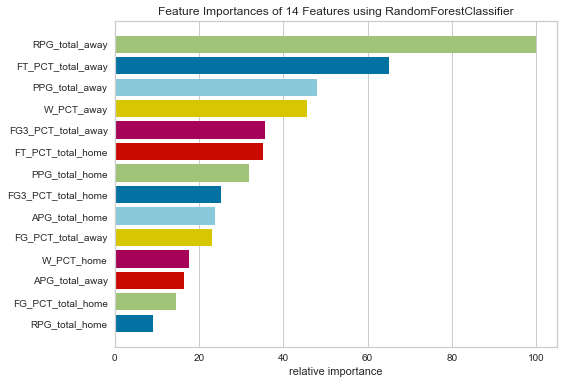

---------------------------------------------
Mean accuracy: 0.6872149841437633
Max accuracy: 0.7170909090909091
Min accuracy: 0.6242732558139535
i=5
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 20, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.97      0.74       563
           1       0.69      0.09      0.16       412

    accuracy                           0.60       975
   macro avg       0.64      0.53      0.45       975
weighted avg       0.63      0.60      0.49       975



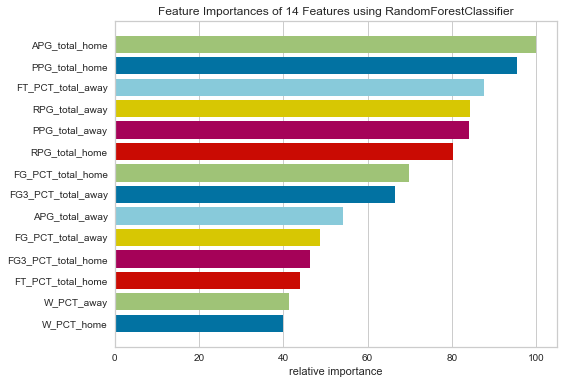

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 478, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       612
           1       0.65      0.44      0.52       363

    accuracy                           0.70       975
   macro avg       0.68      0.65      0.65       975
weighted avg       0.69      0.70      0.69       975



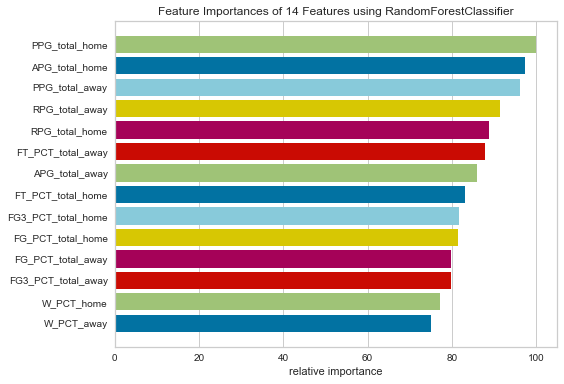

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 30, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       549
           1       0.70      0.14      0.23       425

    accuracy                           0.60       974
   macro avg       0.64      0.55      0.48       974
weighted avg       0.64      0.60      0.51       974



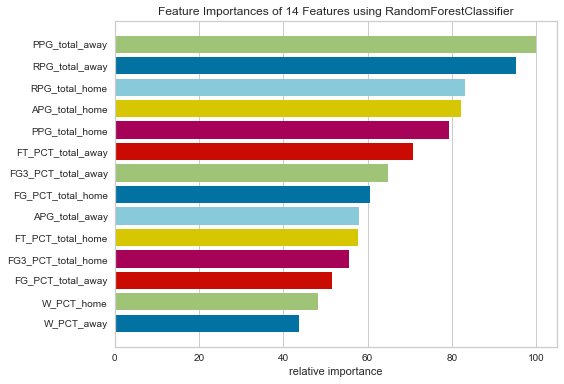

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 614, 'criterion': 'entropy'}): 0.73
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       595
           1       0.76      0.44      0.56       379

    accuracy                           0.73       974
   macro avg       0.74      0.68      0.68       974
weighted avg       0.74      0.73      0.71       974



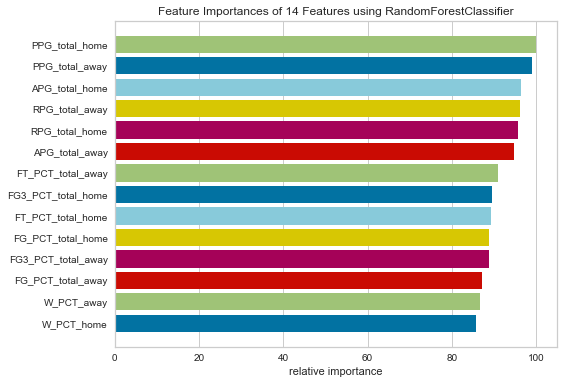

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 470, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       565
           1       0.69      0.39      0.50       409

    accuracy                           0.67       974
   macro avg       0.68      0.63      0.63       974
weighted avg       0.67      0.67      0.65       974



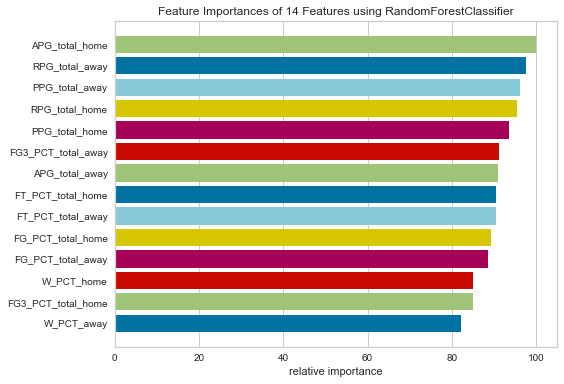

---------------------------------------------
Mean accuracy: 0.6567503817195809
Max accuracy: 0.728952772073922
Min accuracy: 0.5975359342915811
i=10
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 850, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       325
           1       0.67      0.55      0.60       304

    accuracy                           0.65       629
   macro avg       0.65      0.65      0.65       629
weighted avg       0.65      0.65      0.65       629



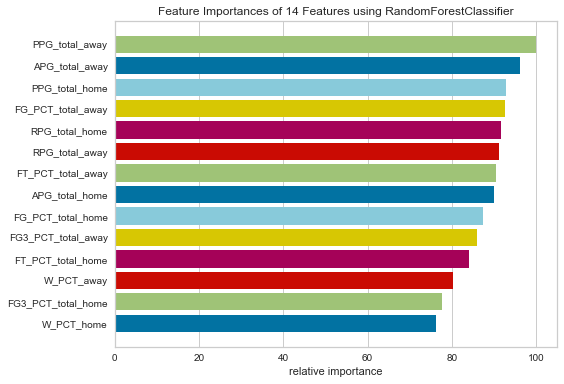

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 750, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       325
           1       0.68      0.59      0.63       304

    accuracy                           0.67       629
   macro avg       0.67      0.67      0.66       629
weighted avg       0.67      0.67      0.67       629



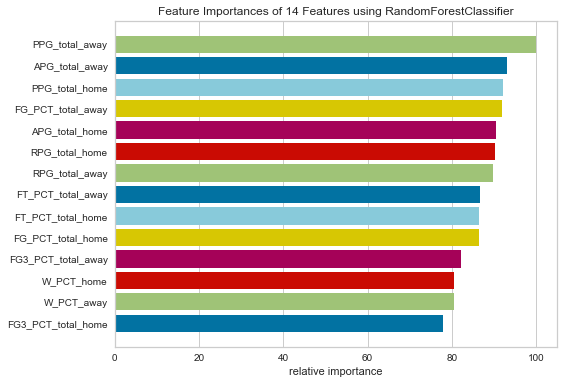

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 774, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.74      0.70       345
           1       0.64      0.57      0.60       284

    accuracy                           0.66       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.66      0.66       629



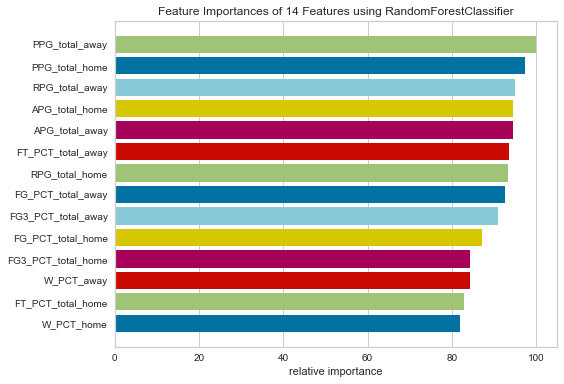

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 826, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       321
           1       0.68      0.56      0.61       308

    accuracy                           0.65       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.65      0.65       629



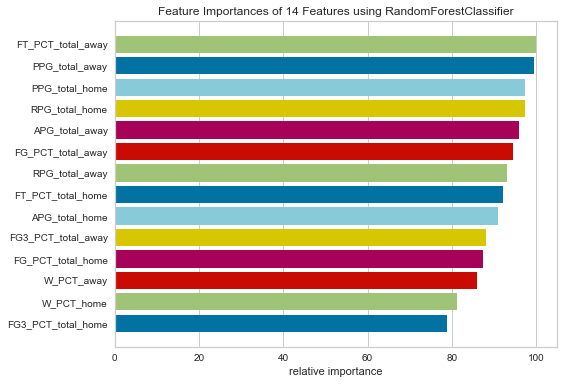

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 410, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       329
           1       0.67      0.58      0.62       300

    accuracy                           0.66       629
   macro avg       0.67      0.66      0.66       629
weighted avg       0.67      0.66      0.66       629



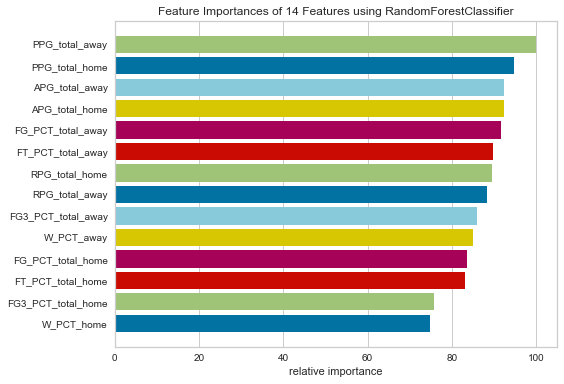

---------------------------------------------
Mean accuracy: 0.6581875993640699
Max accuracy: 0.6677265500794912
Min accuracy: 0.6502384737678856
i=15
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 368, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       301
           1       0.66      0.69      0.68       331

    accuracy                           0.66       632
   macro avg       0.66      0.65      0.65       632
weighted avg       0.66      0.66      0.66       632



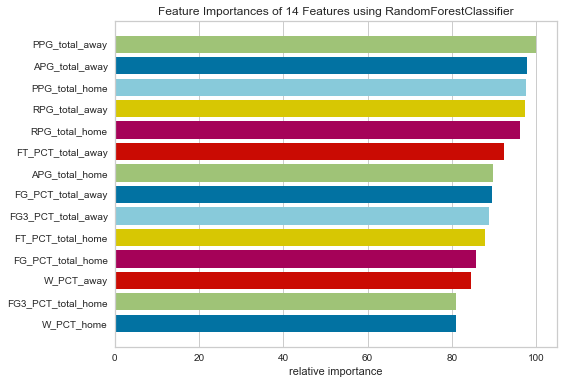

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 174, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       305
           1       0.65      0.64      0.64       327

    accuracy                           0.63       632
   macro avg       0.63      0.63      0.63       632
weighted avg       0.63      0.63      0.63       632



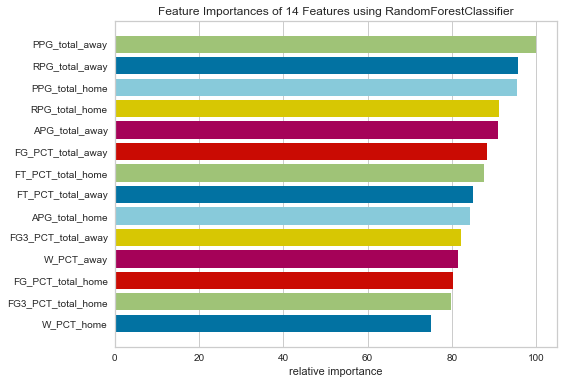

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 308, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       335
           1       0.62      0.68      0.65       297

    accuracy                           0.65       632
   macro avg       0.65      0.65      0.65       632
weighted avg       0.65      0.65      0.65       632



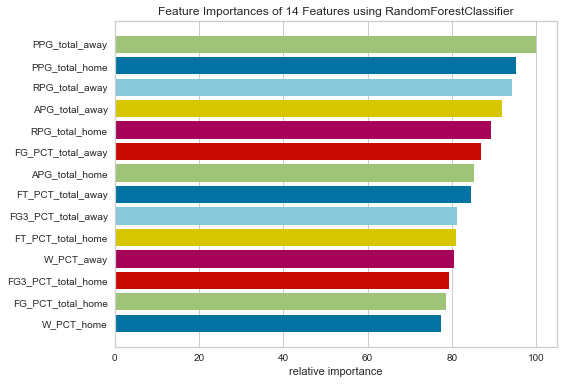

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 574, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       297
           1       0.70      0.62      0.66       334

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.66      0.66      0.66       631



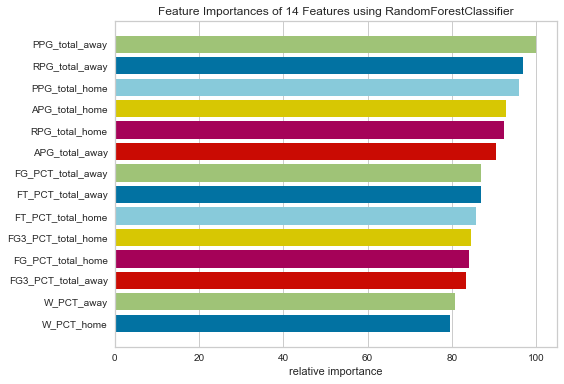

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 948, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       313
           1       0.68      0.67      0.67       318

    accuracy                           0.67       631
   macro avg       0.67      0.67      0.67       631
weighted avg       0.67      0.67      0.67       631



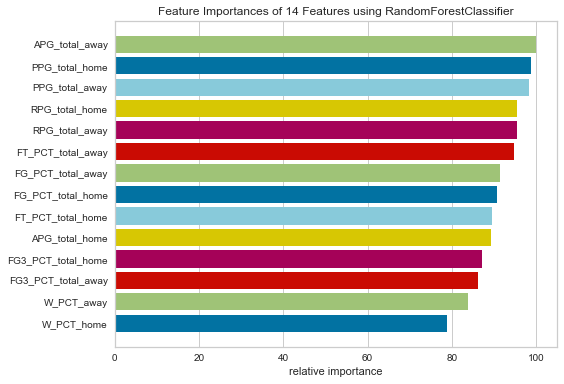

---------------------------------------------
Mean accuracy: 0.6501810467612189
Max accuracy: 0.6576862123613312
Min accuracy: 0.634493670886076
i=20
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 636, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       581
           1       0.66      0.42      0.52       389

    accuracy                           0.68       970
   macro avg       0.67      0.64      0.64       970
weighted avg       0.68      0.68      0.66       970



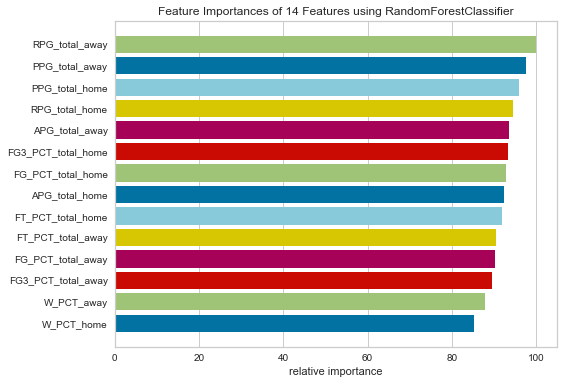

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 840, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       569
           1       0.70      0.42      0.52       401

    accuracy                           0.69       970
   macro avg       0.69      0.65      0.65       970
weighted avg       0.69      0.69      0.67       970



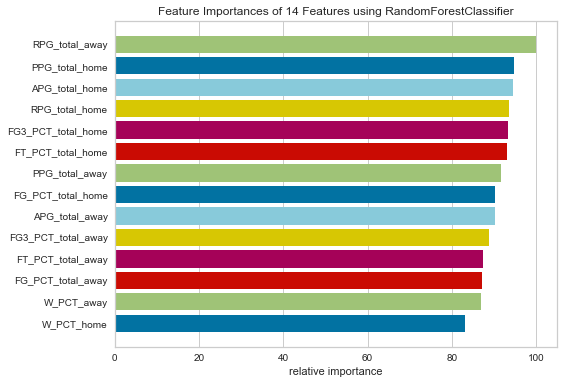

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 784, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       558
           1       0.69      0.38      0.49       412

    accuracy                           0.67       970
   macro avg       0.68      0.63      0.62       970
weighted avg       0.67      0.67      0.64       970



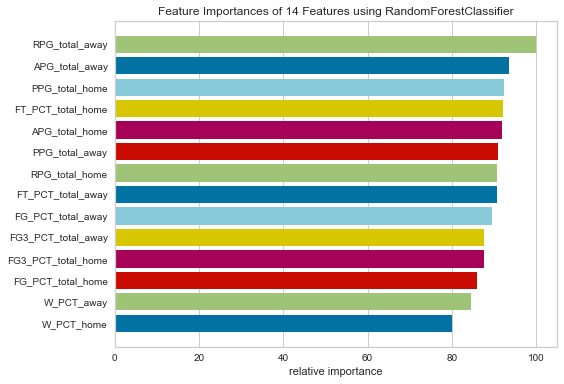

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 962, 'criterion': 'entropy'}): 0.72
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       596
           1       0.72      0.43      0.54       374

    accuracy                           0.72       970
   macro avg       0.72      0.66      0.67       970
weighted avg       0.72      0.72      0.70       970



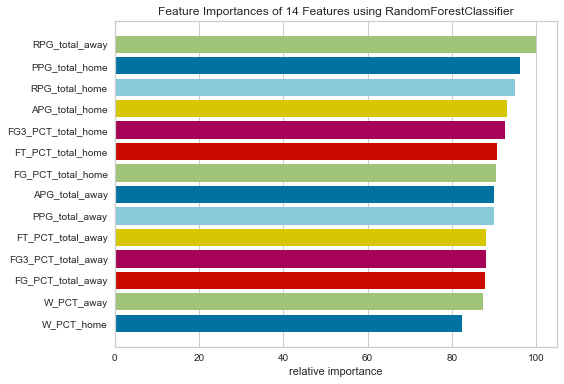

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 642, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       554
           1       0.76      0.42      0.54       415

    accuracy                           0.69       969
   macro avg       0.72      0.66      0.66       969
weighted avg       0.71      0.69      0.67       969



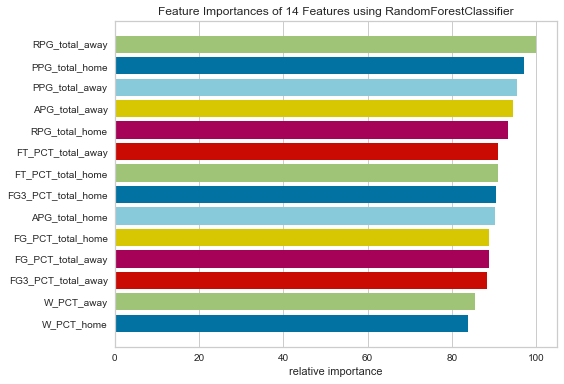

---------------------------------------------
Mean accuracy: 0.6871134020618557
Max accuracy: 0.7154639175257732
Min accuracy: 0.6659793814432989
i=25
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 858, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       499
           1       0.62      0.45      0.52       346

    accuracy                           0.66       845
   macro avg       0.65      0.63      0.63       845
weighted avg       0.66      0.66      0.65       845



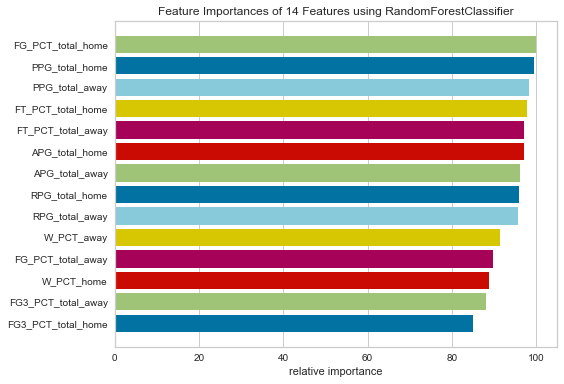

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 320, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.87      0.75       471
           1       0.72      0.41      0.52       374

    accuracy                           0.67       845
   macro avg       0.69      0.64      0.64       845
weighted avg       0.68      0.67      0.65       845



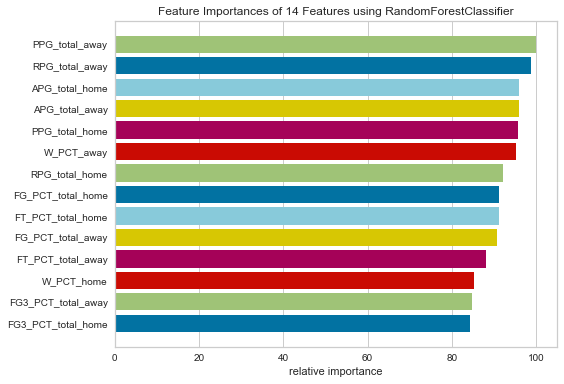

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 996, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       475
           1       0.64      0.43      0.51       369

    accuracy                           0.64       844
   macro avg       0.64      0.62      0.62       844
weighted avg       0.64      0.64      0.63       844



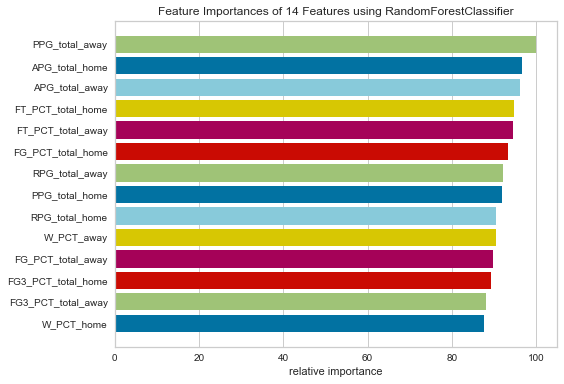

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 630, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       513
           1       0.63      0.41      0.50       331

    accuracy                           0.67       844
   macro avg       0.66      0.63      0.63       844
weighted avg       0.67      0.67      0.66       844



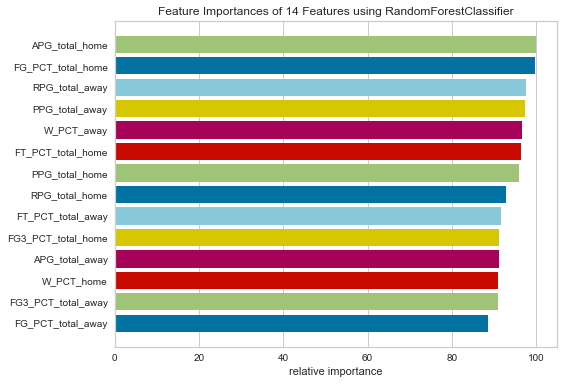

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 836, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.86      0.74       475
           1       0.68      0.39      0.49       369

    accuracy                           0.65       844
   macro avg       0.66      0.62      0.61       844
weighted avg       0.66      0.65      0.63       844



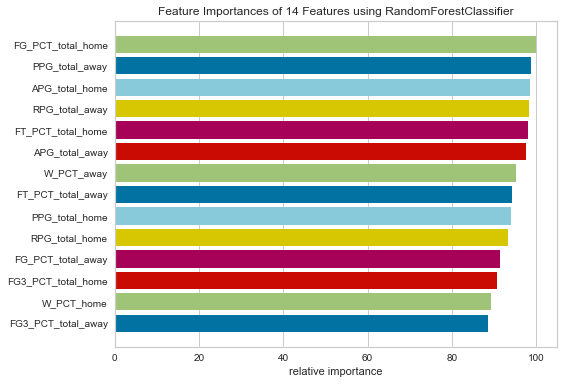

---------------------------------------------
Mean accuracy: 0.6628161894612861
Max accuracy: 0.6741706161137441
Min accuracy: 0.6445497630331753


In [27]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,1000,2)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       868
           1       0.71      0.35      0.47       508

    accuracy                           0.71      1376
   macro avg       0.71      0.63      0.63      1376
weighted avg       0.71      0.71      0.68      1376



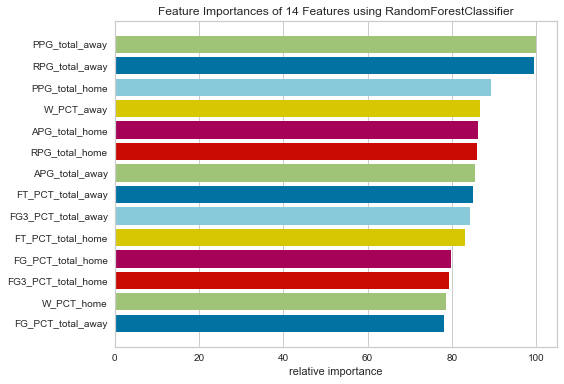

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       855
           1       0.74      0.33      0.46       521

    accuracy                           0.70      1376
   macro avg       0.72      0.63      0.63      1376
weighted avg       0.71      0.70      0.67      1376



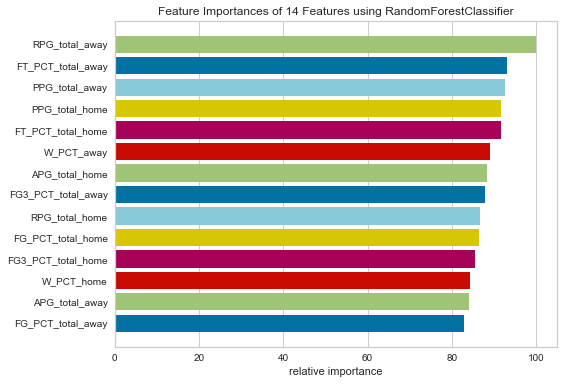

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       866
           1       0.75      0.35      0.47       509

    accuracy                           0.71      1375
   macro avg       0.73      0.64      0.64      1375
weighted avg       0.72      0.71      0.68      1375



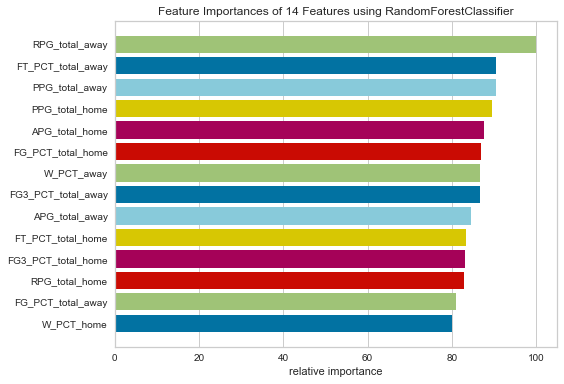

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_features': 3, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       867
           1       0.70      0.39      0.50       508

    accuracy                           0.71      1375
   macro avg       0.71      0.65      0.65      1375
weighted avg       0.71      0.71      0.69      1375



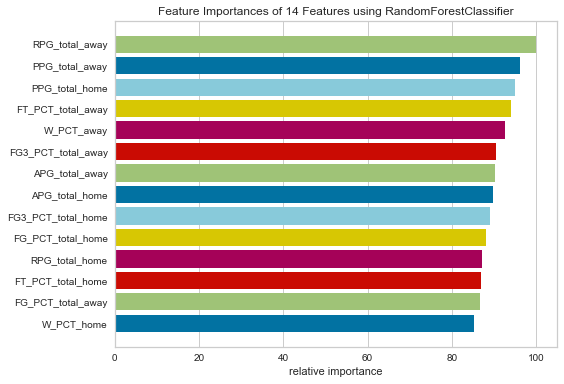

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_features': 'log2', 'criterion': 'entropy'}): 0.73
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       873
           1       0.76      0.38      0.51       502

    accuracy                           0.73      1375
   macro avg       0.74      0.66      0.66      1375
weighted avg       0.74      0.73      0.70      1375



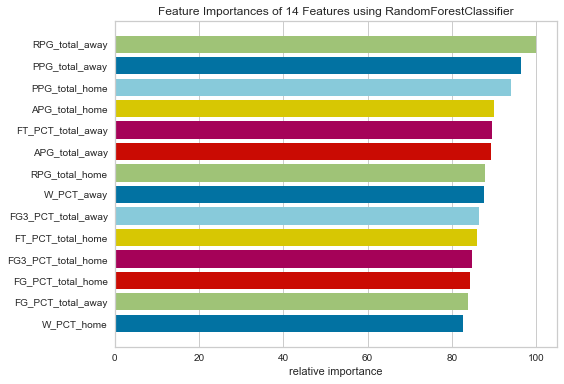

---------------------------------------------
Mean accuracy: 0.7095618393234673
Max accuracy: 0.7141818181818181
Min accuracy: 0.7020348837209303
i=5
FGP:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       563
           1       0.73      0.46      0.56       412

    accuracy                           0.70       975
   macro avg       0.71      0.67      0.67       975
weighted avg       0.70      0.70      0.68       975



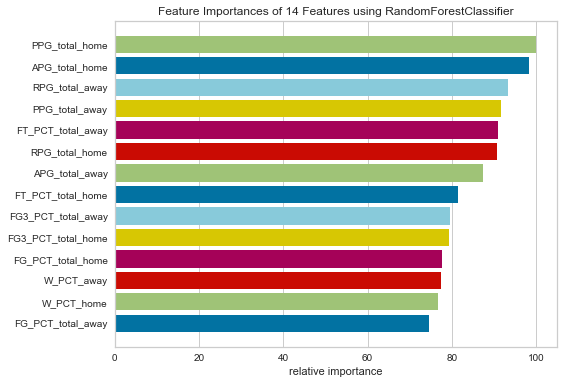

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       612
           1       0.64      0.44      0.52       363

    accuracy                           0.70       975
   macro avg       0.68      0.65      0.65       975
weighted avg       0.69      0.70      0.68       975



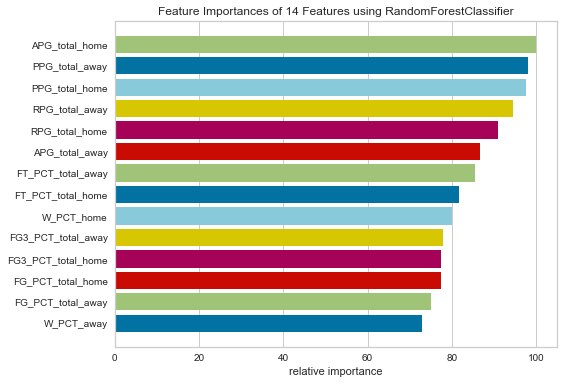

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       549
           1       0.75      0.40      0.52       425

    accuracy                           0.68       974
   macro avg       0.71      0.65      0.64       974
weighted avg       0.70      0.68      0.66       974



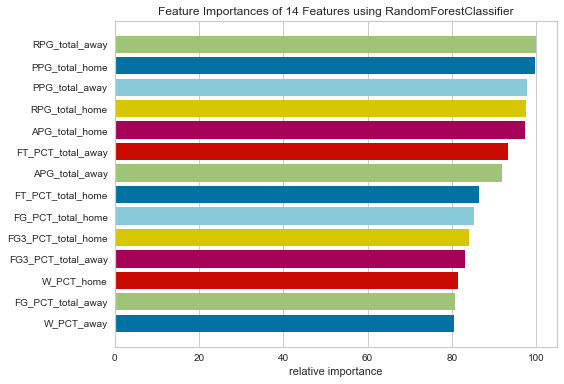

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       595
           1       0.70      0.45      0.55       379

    accuracy                           0.71       974
   macro avg       0.71      0.66      0.67       974
weighted avg       0.71      0.71      0.69       974



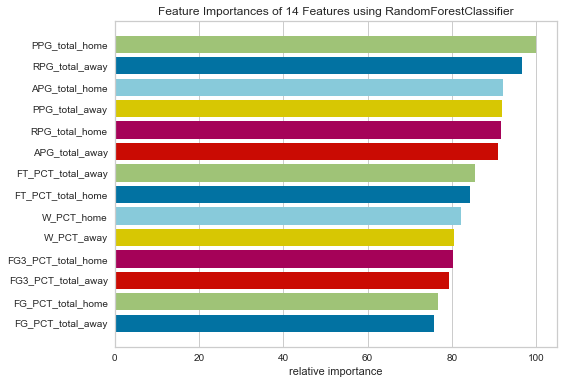

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.69
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       565
           1       0.71      0.45      0.55       409

    accuracy                           0.69       974
   macro avg       0.70      0.66      0.66       974
weighted avg       0.70      0.69      0.68       974



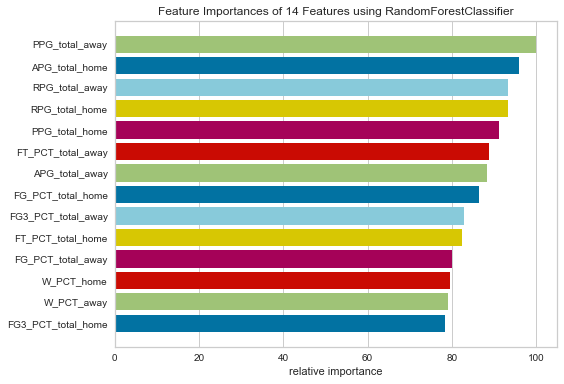

---------------------------------------------
Mean accuracy: 0.6972800505449377
Max accuracy: 0.7104722792607803
Min accuracy: 0.6817248459958932
i=10
FG3:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       325
           1       0.67      0.56      0.61       304

    accuracy                           0.65       629
   macro avg       0.65      0.65      0.65       629
weighted avg       0.65      0.65      0.65       629



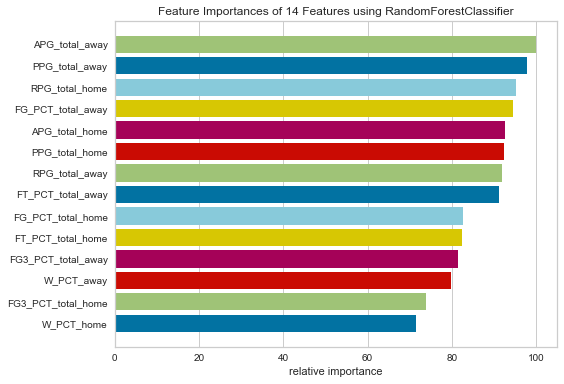

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       325
           1       0.68      0.62      0.65       304

    accuracy                           0.68       629
   macro avg       0.68      0.67      0.67       629
weighted avg       0.68      0.68      0.67       629



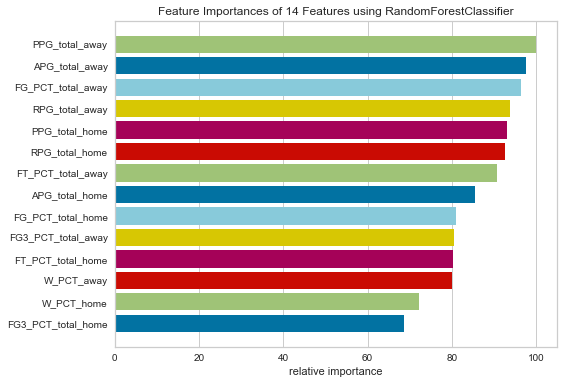

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       345
           1       0.63      0.57      0.60       284

    accuracy                           0.66       629
   macro avg       0.65      0.65      0.65       629
weighted avg       0.66      0.66      0.66       629



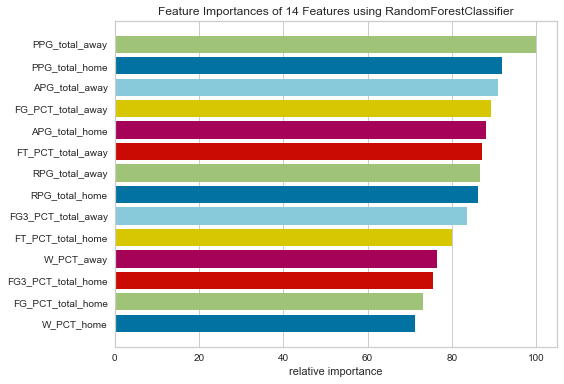

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_features': 'sqrt', 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       321
           1       0.67      0.56      0.61       308

    accuracy                           0.65       629
   macro avg       0.65      0.65      0.64       629
weighted avg       0.65      0.65      0.64       629



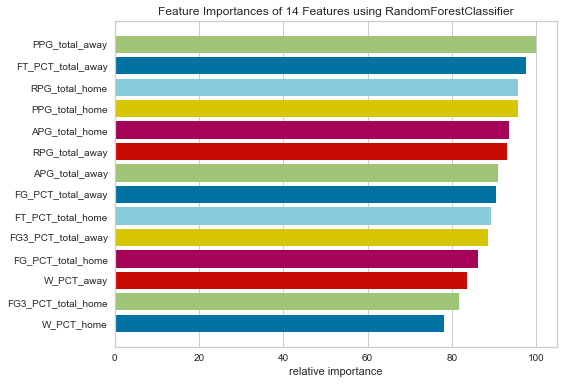

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_features': 6, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       329
           1       0.68      0.56      0.61       300

    accuracy                           0.66       629
   macro avg       0.67      0.66      0.66       629
weighted avg       0.67      0.66      0.66       629



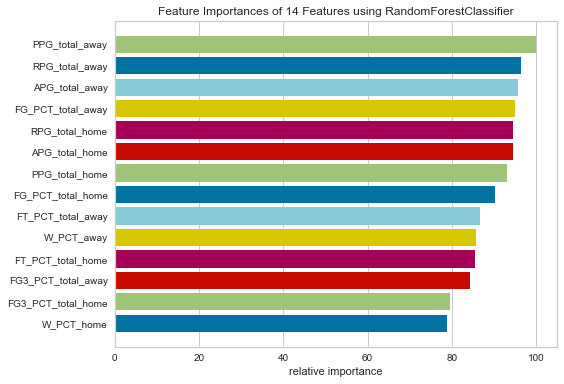

---------------------------------------------
Mean accuracy: 0.6581875993640699
Max accuracy: 0.6756756756756757
Min accuracy: 0.6470588235294118
i=15
FT:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       301
           1       0.66      0.67      0.66       331

    accuracy                           0.65       632
   macro avg       0.64      0.64      0.64       632
weighted avg       0.65      0.65      0.65       632



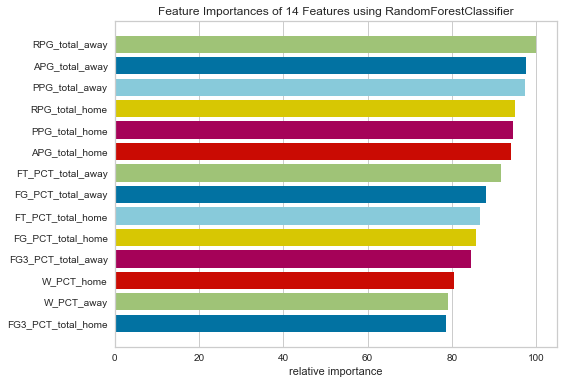

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       305
           1       0.67      0.63      0.65       327

    accuracy                           0.65       632
   macro avg       0.65      0.65      0.65       632
weighted avg       0.65      0.65      0.65       632



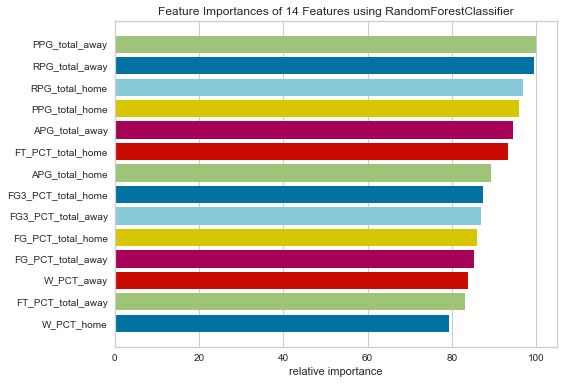

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       335
           1       0.62      0.65      0.64       297

    accuracy                           0.65       632
   macro avg       0.65      0.65      0.65       632
weighted avg       0.65      0.65      0.65       632



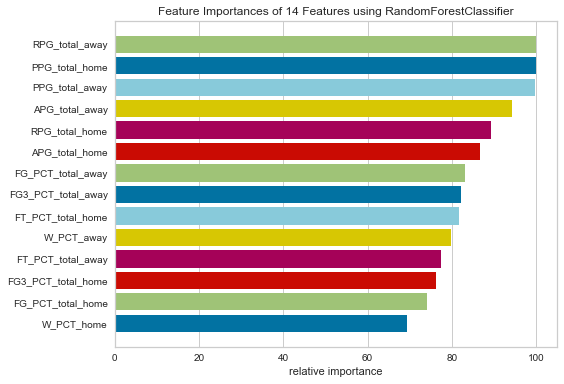

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       297
           1       0.70      0.63      0.66       334

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.67      0.66      0.66       631



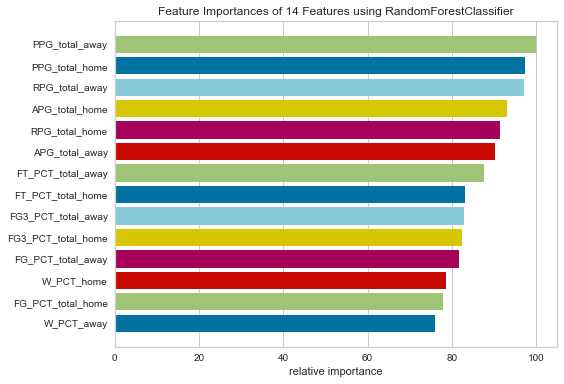

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       313
           1       0.71      0.70      0.70       318

    accuracy                           0.70       631
   macro avg       0.70      0.70      0.70       631
weighted avg       0.70      0.70      0.70       631



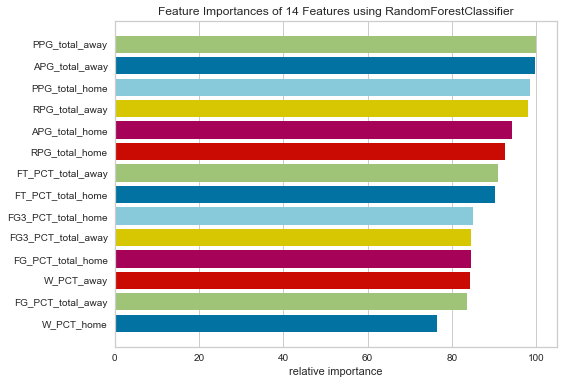

---------------------------------------------
Mean accuracy: 0.6509740666813777
Max accuracy: 0.6624405705229794
Min accuracy: 0.6455696202531646
i=20
AST:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       581
           1       0.68      0.40      0.50       389

    accuracy                           0.68       970
   macro avg       0.68      0.64      0.64       970
weighted avg       0.68      0.68      0.66       970



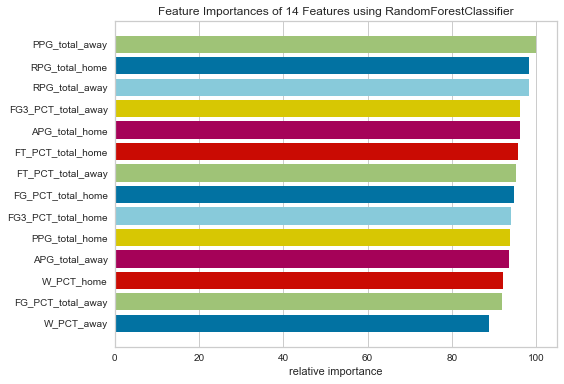

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       569
           1       0.71      0.42      0.53       401

    accuracy                           0.69       970
   macro avg       0.70      0.65      0.65       970
weighted avg       0.69      0.69      0.67       970



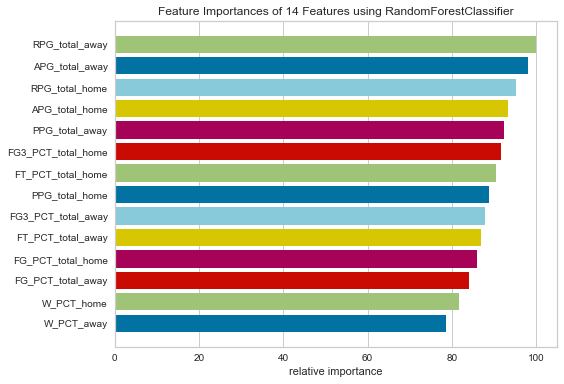

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_features': 5, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.65      0.84      0.73       558
           1       0.64      0.39      0.48       412

    accuracy                           0.65       970
   macro avg       0.65      0.61      0.61       970
weighted avg       0.65      0.65      0.63       970



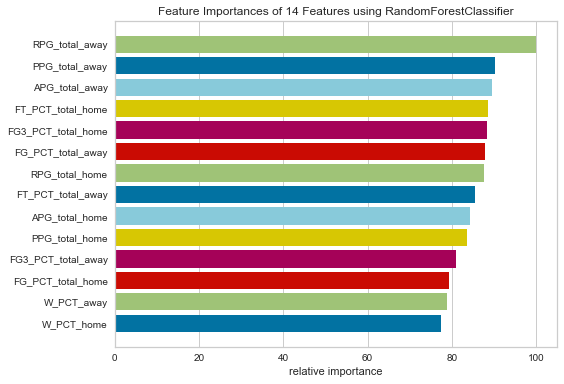

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       596
           1       0.66      0.44      0.53       374

    accuracy                           0.70       970
   macro avg       0.68      0.65      0.65       970
weighted avg       0.69      0.70      0.68       970



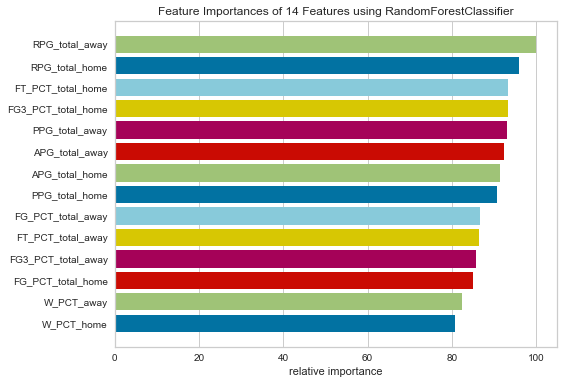

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       554
           1       0.77      0.34      0.47       415

    accuracy                           0.67       969
   macro avg       0.71      0.63      0.62       969
weighted avg       0.70      0.67      0.64       969



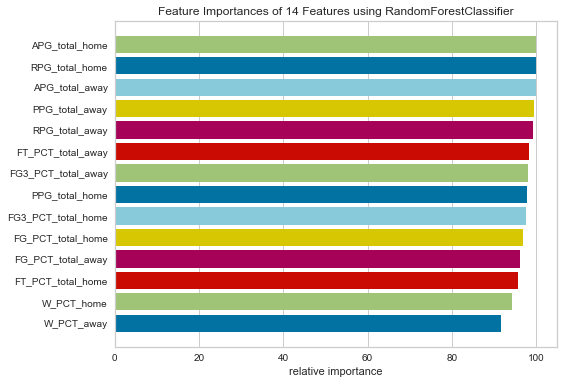

---------------------------------------------
Mean accuracy: 0.6793814432989691
Max accuracy: 0.6969072164948453
Min accuracy: 0.6474226804123712
i=25
REB:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       499
           1       0.64      0.49      0.55       346

    accuracy                           0.68       845
   macro avg       0.67      0.65      0.65       845
weighted avg       0.67      0.68      0.67       845



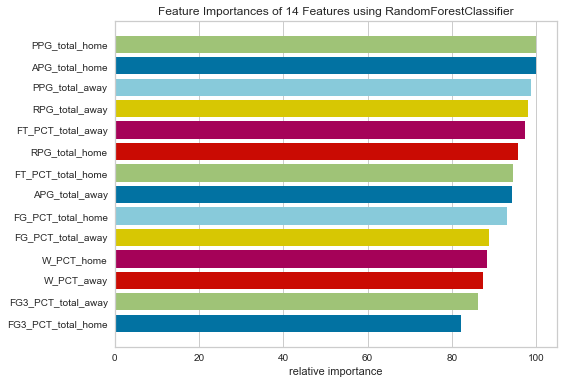

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_features': 'log2', 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       471
           1       0.73      0.39      0.51       374

    accuracy                           0.67       845
   macro avg       0.69      0.64      0.63       845
weighted avg       0.68      0.67      0.64       845



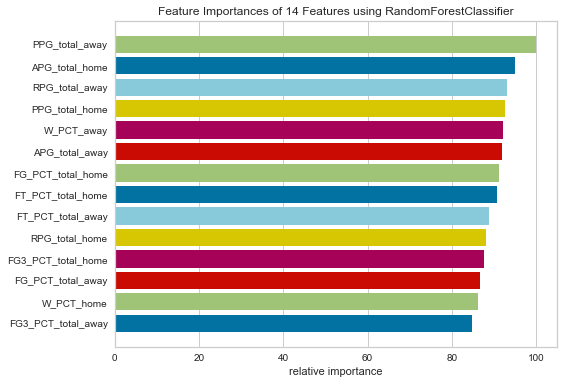

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      0.79      0.71       475
           1       0.61      0.41      0.49       369

    accuracy                           0.63       844
   macro avg       0.62      0.60      0.60       844
weighted avg       0.62      0.63      0.61       844



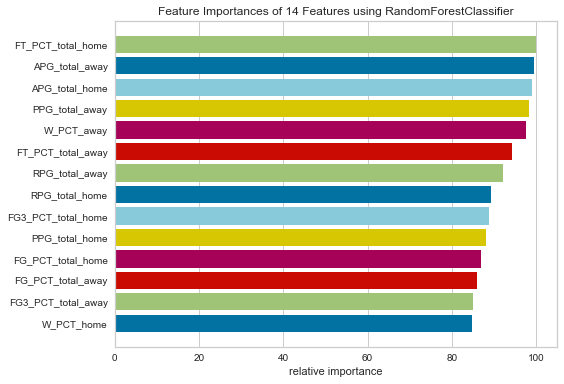

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       513
           1       0.64      0.42      0.50       331

    accuracy                           0.68       844
   macro avg       0.66      0.63      0.63       844
weighted avg       0.67      0.68      0.66       844



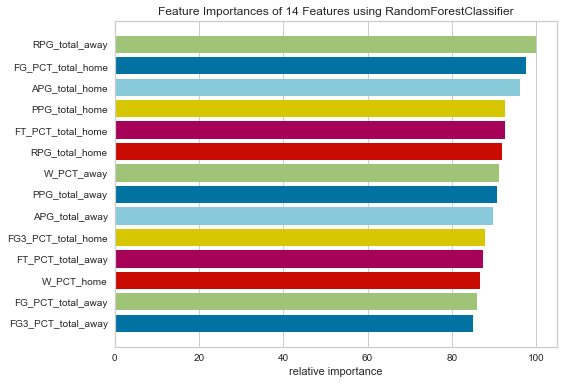

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.65      0.85      0.73       475
           1       0.68      0.40      0.50       369

    accuracy                           0.65       844
   macro avg       0.66      0.63      0.62       844
weighted avg       0.66      0.65      0.63       844



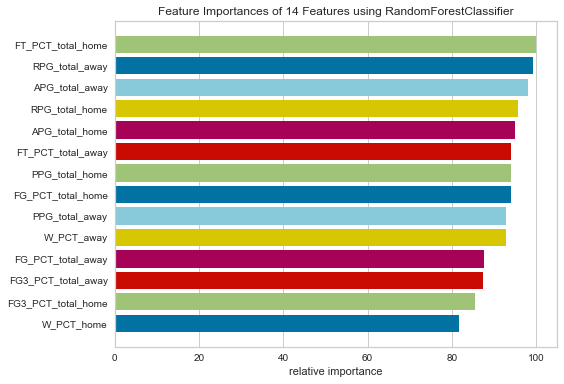

---------------------------------------------
Mean accuracy: 0.6622202669732746
Max accuracy: 0.6777251184834123
Min accuracy: 0.6267772511848341


In [28]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       868
           1       0.68      0.28      0.39       508

    accuracy                           0.68      1376
   macro avg       0.68      0.60      0.59      1376
weighted avg       0.68      0.68      0.64      1376



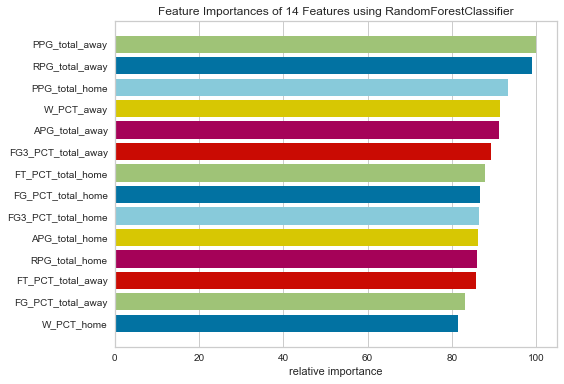

---------------------------------------------
i=1


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       855
           1       0.72      0.34      0.46       521

    accuracy                           0.70      1376
   macro avg       0.71      0.63      0.63      1376
weighted avg       0.71      0.70      0.67      1376



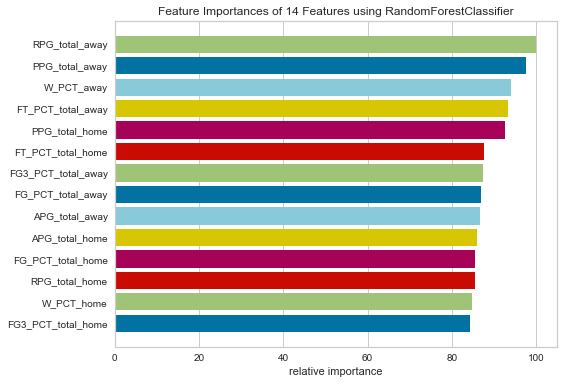

---------------------------------------------
i=2


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.71
              precision    recall  f1-score   support

           0       0.70      0.95      0.80       866
           1       0.77      0.30      0.44       509

    accuracy                           0.71      1375
   macro avg       0.74      0.63      0.62      1375
weighted avg       0.73      0.71      0.67      1375



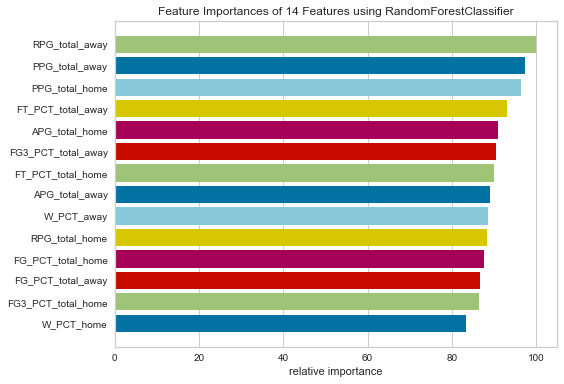

---------------------------------------------
i=3


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.71
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       867
           1       0.70      0.39      0.50       508

    accuracy                           0.71      1375
   macro avg       0.71      0.65      0.65      1375
weighted avg       0.71      0.71      0.69      1375



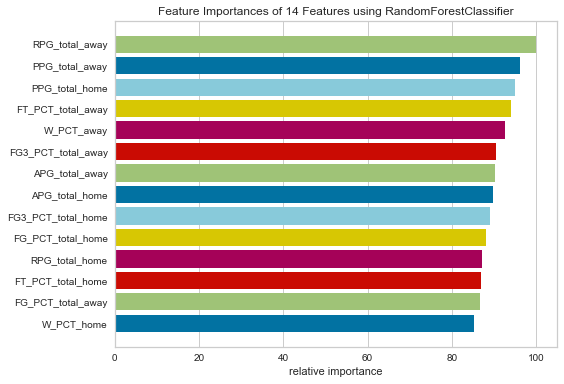

---------------------------------------------
i=4


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.73
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       873
           1       0.79      0.35      0.49       502

    accuracy                           0.73      1375
   macro avg       0.76      0.65      0.65      1375
weighted avg       0.75      0.73      0.70      1375



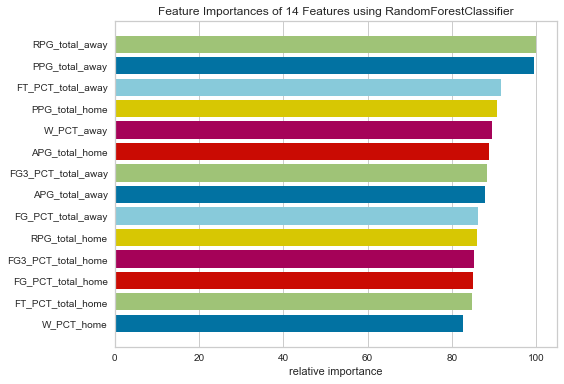

---------------------------------------------
Mean accuracy: 0.7022934725158563
Max accuracy: 0.7141818181818181
Min accuracy: 0.684593023255814
i=5


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.68
              precision    recall  f1-score   support

           0       0.66      0.91      0.77       563
           1       0.75      0.36      0.49       412

    accuracy                           0.68       975
   macro avg       0.70      0.64      0.63       975
weighted avg       0.70      0.68      0.65       975



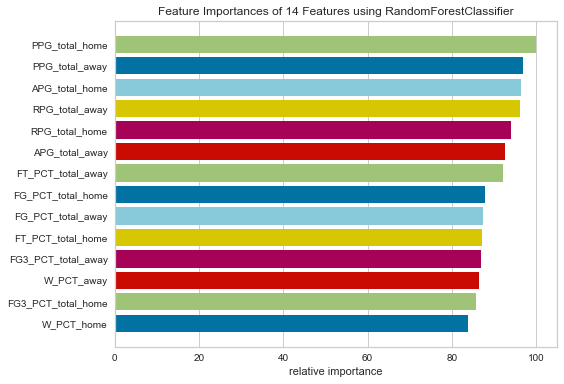

---------------------------------------------
i=6


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.69
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       612
           1       0.64      0.42      0.50       363

    accuracy                           0.69       975
   macro avg       0.67      0.64      0.64       975
weighted avg       0.68      0.69      0.68       975



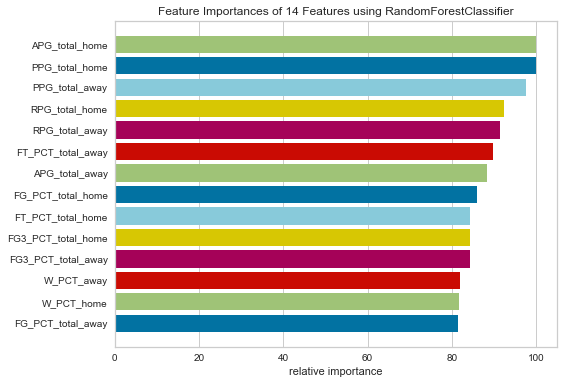

---------------------------------------------
i=7


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.90      0.75       549
           1       0.75      0.36      0.49       425

    accuracy                           0.67       974
   macro avg       0.70      0.63      0.62       974
weighted avg       0.69      0.67      0.64       974



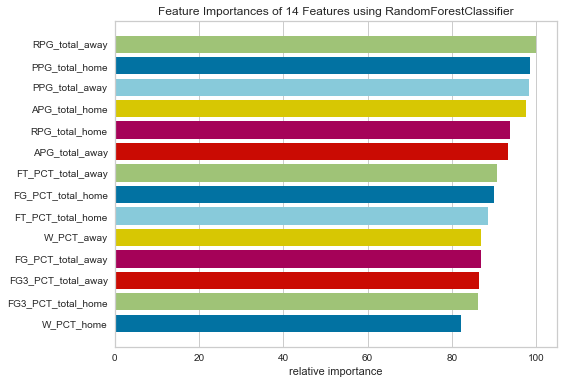

---------------------------------------------
i=8


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       595
           1       0.73      0.41      0.53       379

    accuracy                           0.71       974
   macro avg       0.72      0.66      0.66       974
weighted avg       0.71      0.71      0.69       974



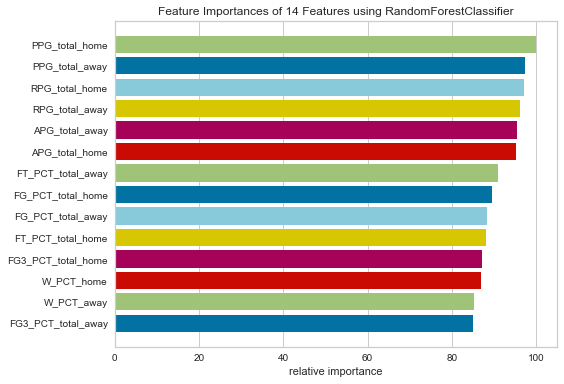

---------------------------------------------
i=9


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FGP:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.69
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       565
           1       0.72      0.42      0.53       409

    accuracy                           0.69       974
   macro avg       0.70      0.65      0.65       974
weighted avg       0.69      0.69      0.67       974



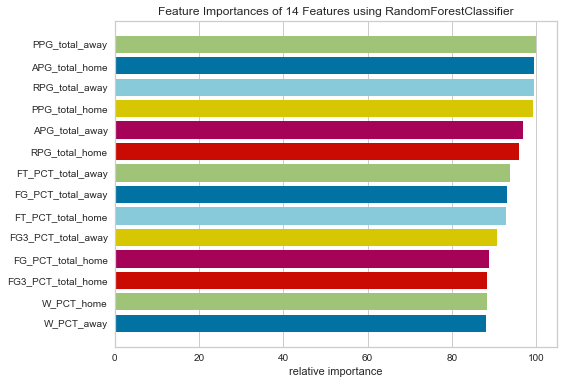

---------------------------------------------
Mean accuracy: 0.6880458590006844
Max accuracy: 0.7104722792607803
Min accuracy: 0.6683778234086243
i=10


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       325
           1       0.69      0.57      0.62       304

    accuracy                           0.67       629
   macro avg       0.67      0.66      0.66       629
weighted avg       0.67      0.67      0.66       629



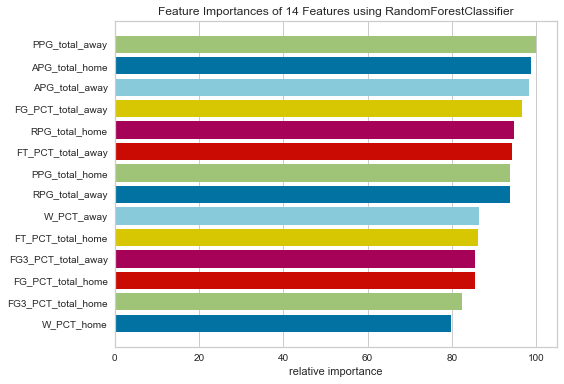

---------------------------------------------
i=11


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       325
           1       0.66      0.61      0.63       304

    accuracy                           0.66       629
   macro avg       0.66      0.66      0.66       629
weighted avg       0.66      0.66      0.66       629



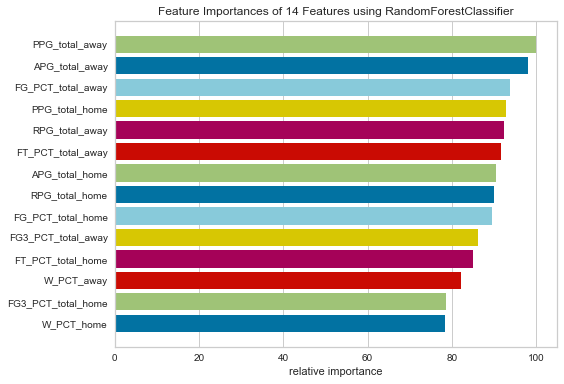

---------------------------------------------
i=12


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       345
           1       0.64      0.57      0.60       284

    accuracy                           0.66       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.66      0.66       629



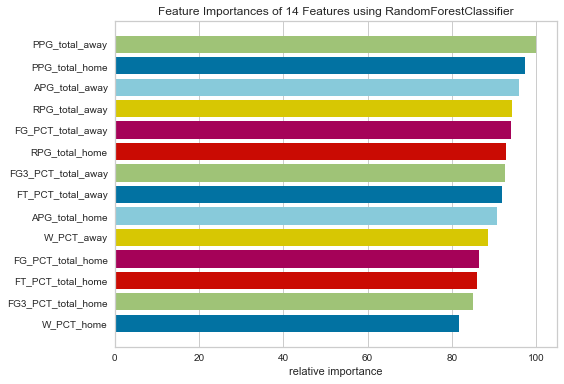

---------------------------------------------
i=13


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       321
           1       0.67      0.56      0.61       308

    accuracy                           0.65       629
   macro avg       0.65      0.65      0.64       629
weighted avg       0.65      0.65      0.64       629



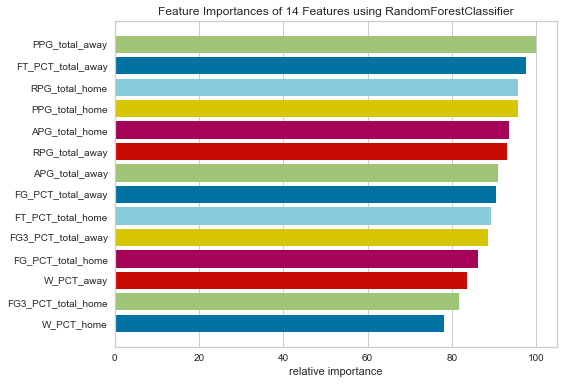

---------------------------------------------
i=14


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FG3:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       329
           1       0.67      0.55      0.60       300

    accuracy                           0.66       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.66      0.65       629



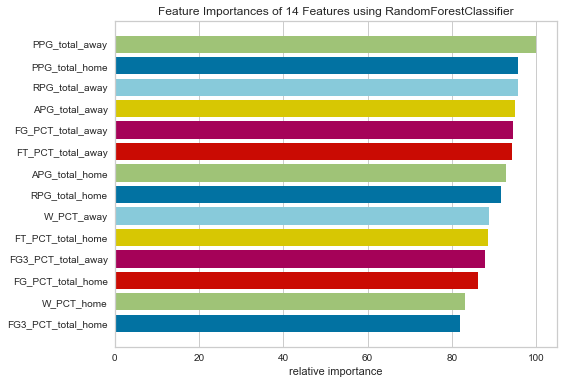

---------------------------------------------
Mean accuracy: 0.6585850556438791
Max accuracy: 0.6677265500794912
Min accuracy: 0.6470588235294118
i=15


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       301
           1       0.68      0.71      0.69       331

    accuracy                           0.67       632
   macro avg       0.67      0.67      0.67       632
weighted avg       0.67      0.67      0.67       632



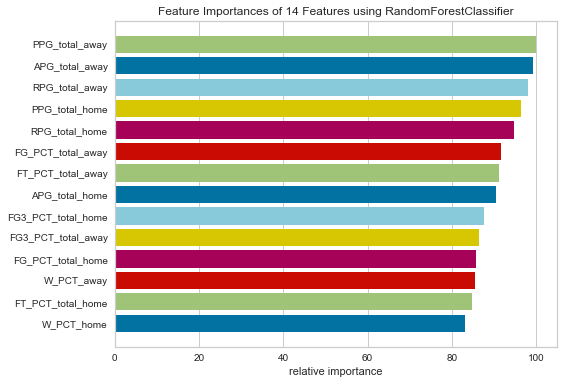

---------------------------------------------
i=16


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       305
           1       0.68      0.63      0.65       327

    accuracy                           0.65       632
   macro avg       0.65      0.65      0.65       632
weighted avg       0.65      0.65      0.65       632



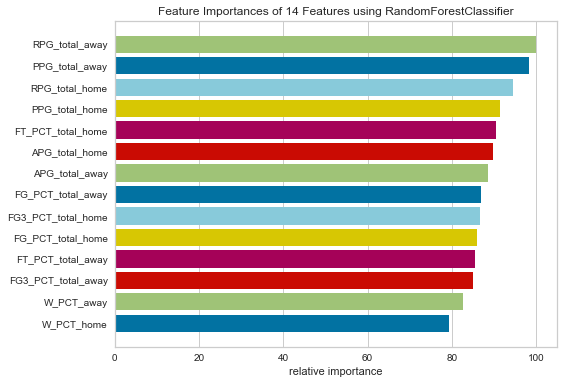

---------------------------------------------
i=17


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       335
           1       0.62      0.65      0.63       297

    accuracy                           0.65       632
   macro avg       0.65      0.65      0.65       632
weighted avg       0.65      0.65      0.65       632



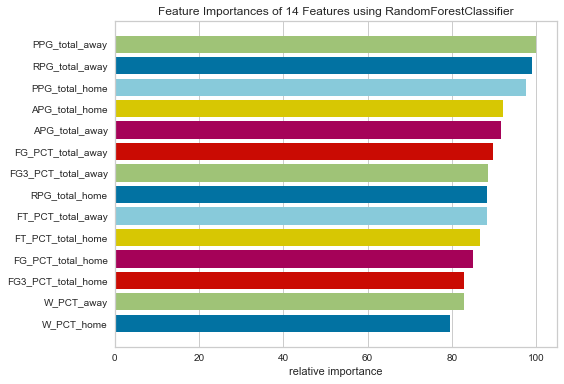

---------------------------------------------
i=18


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.65
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       297
           1       0.70      0.61      0.65       334

    accuracy                           0.65       631
   macro avg       0.66      0.66      0.65       631
weighted avg       0.66      0.65      0.65       631



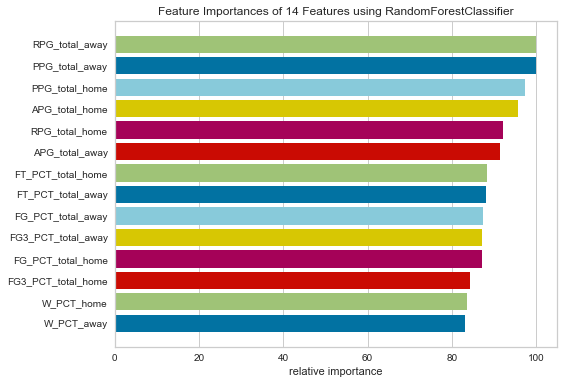

---------------------------------------------
i=19


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


FT:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       313
           1       0.66      0.66      0.66       318

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.66      0.66      0.66       631



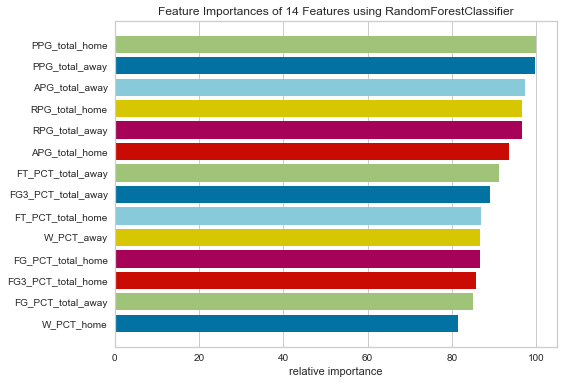

---------------------------------------------
Mean accuracy: 0.6549260015246043
Max accuracy: 0.6693037974683544
Min accuracy: 0.6455696202531646
i=20


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.68
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       581
           1       0.67      0.38      0.48       389

    accuracy                           0.68       970
   macro avg       0.67      0.63      0.62       970
weighted avg       0.67      0.68      0.65       970



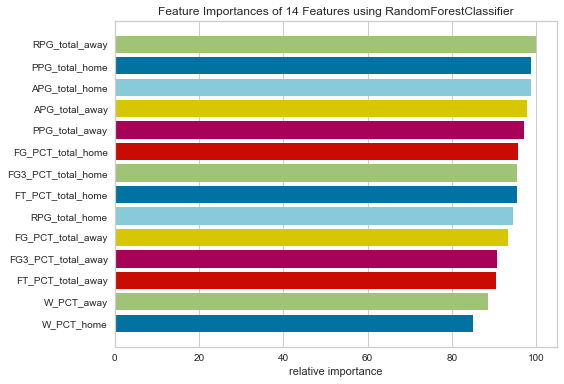

---------------------------------------------
i=21


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.67
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       569
           1       0.67      0.39      0.49       401

    accuracy                           0.67       970
   macro avg       0.67      0.63      0.62       970
weighted avg       0.67      0.67      0.64       970



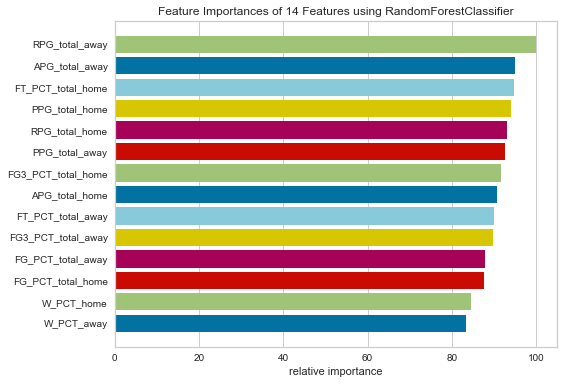

---------------------------------------------
i=22


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       558
           1       0.69      0.39      0.50       412

    accuracy                           0.67       970
   macro avg       0.67      0.63      0.62       970
weighted avg       0.67      0.67      0.64       970



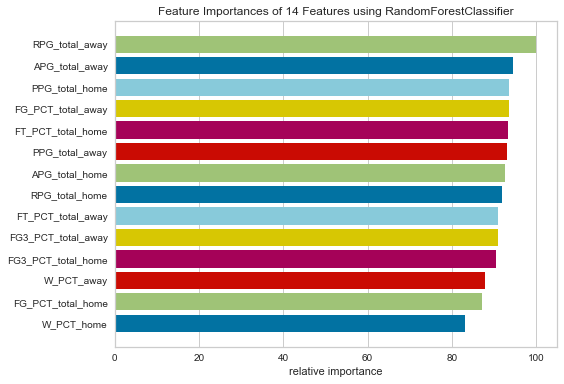

---------------------------------------------
i=23


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.70
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       596
           1       0.71      0.39      0.50       374

    accuracy                           0.70       970
   macro avg       0.70      0.64      0.64       970
weighted avg       0.70      0.70      0.68       970



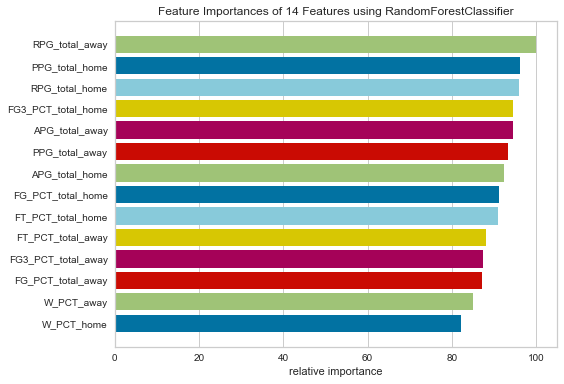

---------------------------------------------
i=24


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.69
              precision    recall  f1-score   support

           0       0.66      0.93      0.78       554
           1       0.80      0.37      0.51       415

    accuracy                           0.69       969
   macro avg       0.73      0.65      0.64       969
weighted avg       0.72      0.69      0.66       969



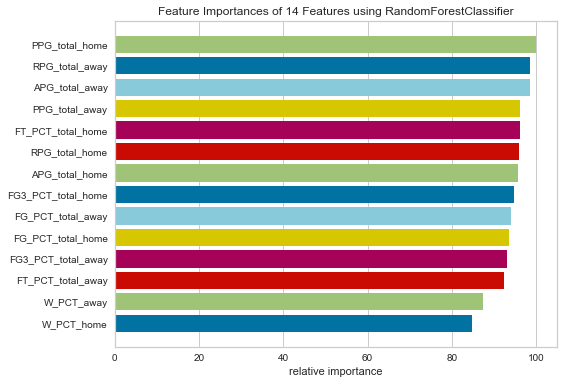

---------------------------------------------
Mean accuracy: 0.677319587628866
Max accuracy: 0.7010309278350515
Min accuracy: 0.6659793814432989
i=25


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       499
           1       0.64      0.45      0.53       346

    accuracy                           0.67       845
   macro avg       0.66      0.64      0.64       845
weighted avg       0.67      0.67      0.66       845



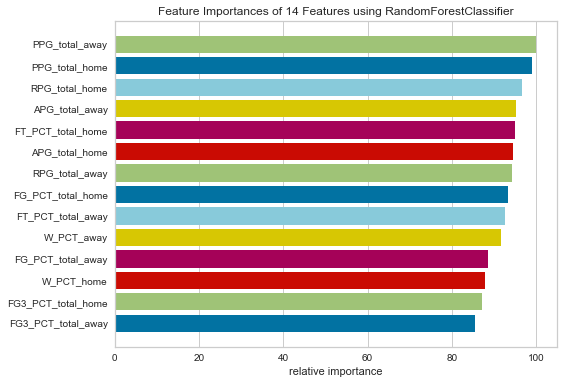

---------------------------------------------
i=26


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.67
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       471
           1       0.73      0.39      0.51       374

    accuracy                           0.67       845
   macro avg       0.69      0.64      0.63       845
weighted avg       0.68      0.67      0.64       845



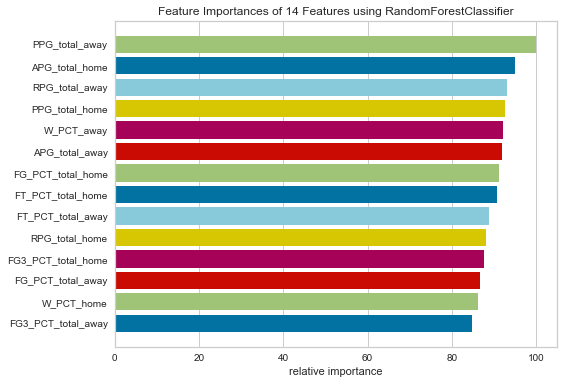

---------------------------------------------
i=27


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       475
           1       0.63      0.45      0.52       369

    accuracy                           0.64       844
   macro avg       0.64      0.62      0.62       844
weighted avg       0.64      0.64      0.63       844



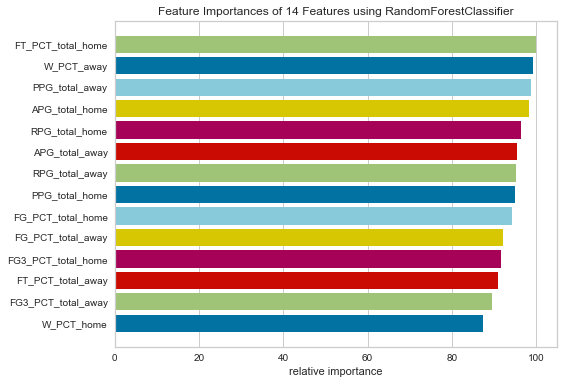

---------------------------------------------
i=28


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       513
           1       0.66      0.40      0.50       331

    accuracy                           0.68       844
   macro avg       0.68      0.63      0.63       844
weighted avg       0.68      0.68      0.66       844



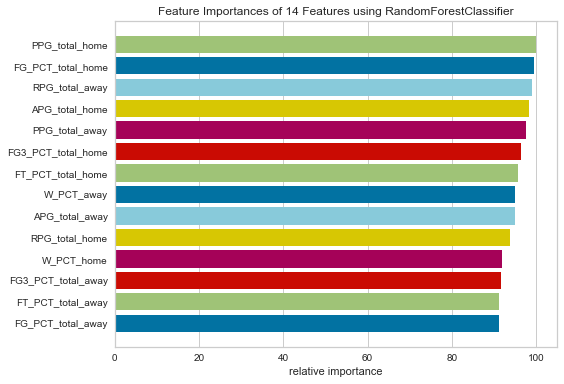

---------------------------------------------
i=29


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       475
           1       0.72      0.37      0.49       369

    accuracy                           0.66       844
   macro avg       0.69      0.63      0.62       844
weighted avg       0.68      0.66      0.64       844



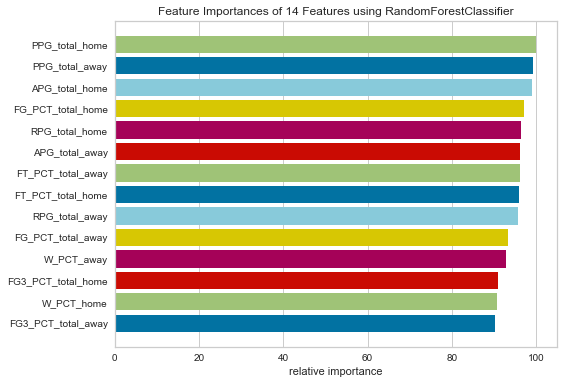

---------------------------------------------
Mean accuracy: 0.6663685885751143
Max accuracy: 0.683649289099526
Min accuracy: 0.6421800947867299


In [29]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})